***
<h3 align="center" style="font-weight: bold; font-family: Arial, Helvetica, sans-serif;">
<strong>DS322: Machine Learning</strong>
</h3>

***

<h1 align="center" style="font-weight: bold; font-family: Arial, Helvetica, sans-serif;">
Barangay-Level Urban Heat Island Prediction Using Machine Learning in Cagayan de Oro City
</h1>

<h5 align="center" style="font-family: Arial, Helvetica, sans-serif;">
Kein Jake Culanggo - Keith Laspoña - Ian Jure Macalisang - Honey Angel Pabololot - Kimberly Vocales
</h5>

<br>

***

<div style="text-align: center; margin: auto;">
  <a href="https://heatscape.streamlit.app" target="_blank">
    <img
      src="https://raw.githubusercontent.com/ianjure/heatscape/refs/heads/main/HeatScapeMap.png"
      alt="HeatScape Map"
      style="width: 100%; height: auto; display: block;"
    >
  </a>
</div>

## **1 Executive Summary**

**Urban Heat Island (UHI)** refers to the phenomenon where urban areas experience higher temperatures than their rural surroundings due to human activities and built environment characteristics such as concrete surfaces and reduced vegetation.

This study investigates the *prediction of UHI intensity at the barangay level in Cagayan de Oro City* using machine learning techniques. Multiple candidate models were evaluated, with **XGBoost** emerging as the top performer. It achieved an impressive *R-squared score of 0.955* and a low *mean squared error (MSE) of 0.594* on the test set, demonstrating high accuracy in capturing the spatial variability of UHI across diverse urban settings.

The model’s predictions closely align with observed UHI index values, confirmed through visualization of predicted versus actual data points, which predominantly cluster along the ideal diagonal line. Minor outliers exist but do not significantly detract from overall performance.

Feature importance analysis using **SHAP values** reveals that urbanization metrics are the primary drivers of UHI intensity.

- Normalized Difference Built-up Index (NDBI)
- Urban Canyon Effect
- Nighttime Lights

The following features are *key contributors* to increased heat accumulation, highlighting the role of dense built environments and human activities. Conversely, natural cooling factors such as vegetation and moisture—captured by the cooling capacity metric—mitigate heat buildup effectively. Additionally, terrain-related features (microclimate_mod) and atmospheric conditions (omega_500) also influence localized heat retention.

These findings underscore the *critical need for urban planning interventions focused on increasing green spaces and enhancing airflow through optimized urban design.* Targeted strategies at the barangay level can help reduce heat stress, improve local microclimates, and promote climate resilience in rapidly urbanizing areas like Cagayan de Oro City.

## **2 Introduction**

*Urbanization* is rapidly transforming landscapes worldwide, leading to significant environmental challenges. One notable consequence is the **Urban Heat Island (UHI)** effect, where urban areas experience elevated temperatures compared to surrounding rural zones.

This temperature increase results primarily from the extensive use of heat-absorbing materials like concrete and asphalt, reduced vegetation, and anthropogenic heat emissions from vehicles, industries, and buildings. Elevated urban temperatures can exacerbate heat stress, reduce air quality, and increase energy consumption, posing health risks and impacting urban sustainability.

<div style="text-align: center; margin: 20px auto;">
  <img
    src="https://i.ibb.co/DfLxJ4jQ/Untitled-design-45.png"
    alt="Cagayan de Oro"
    style="max-width: 100%; height: auto; display: block; margin: 0 auto; border: 1px solid #ddd;"
  >
</div>

*Cagayan de Oro City*, a growing urban center in the Philippines, is increasingly vulnerable to UHI effects due to its expanding built environment and changing land use patterns. Understanding and predicting UHI intensity at a fine spatial scale, such as the barangay level, is essential for effective urban planning and climate adaptation strategies. Machine learning techniques offer a promising approach to model complex interactions between urban features, terrain, atmospheric conditions, and vegetation that influence UHI intensity.

## **3 Problem Statement**

Despite the growing awareness of UHI effects in urban areas, there is *limited research focused on fine-scale prediction and analysis of UHI* at the barangay level in Cagayan de Oro City. Existing studies often rely on coarse spatial data or simple modeling approaches that fail to capture local variability in urban form, microclimate, and natural cooling mechanisms. This gap restricts the ability of city planners and policymakers to implement targeted interventions aimed at mitigating heat stress in vulnerable communities.

This study aims to *develop an accurate machine learning model to predict UHI intensity across barangays in Cagayan de Oro City*. By integrating diverse urban, terrain, and atmospheric features, the research seeks to identify key drivers of UHI at a local scale and provide actionable insights to support urban heat mitigation and sustainable development initiatives. Furthermore, the *interactive dashboard* created as part of this project offers a practical platform for stakeholders to simulate how modifications in urban features can influence UHI intensity, facilitating informed decision-making and adaptive urban planning.

## **4 Dataset Description**

The dataset used in this study *integrates a comprehensive set of environmental, meteorological, and anthropogenic variables* that influence the Urban Heat Island (UHI) effect at the barangay level in Cagayan de Oro City.

These features are sourced primarily from satellite remote sensing and atmospheric reanalysis data accessed via **Google Earth Engine API**, capturing diverse surface, terrain, and atmospheric conditions. By combining variables related to:

- land surface temperature,
- vegetation,
- urban development,
- topography,
- pollution,
- radiation, and
- weather

the *dataset provides a rich representation of factors driving spatial and temporal variations in urban heat.* The table below summarizes the key features, their descriptions, and their data sources.

|Feature Category|Feature Name|Description|GEE Collection / Band|
|---|---|---|---|
|Land Surface Temperature|LST|Day land surface temperature|`MODIS/061/MOD11A2` - "LST_Day_1km"|
|Vegetation, Built-up, & Water Indices|NDVI|Normalized Difference Vegetation Index measuring vegetation greenness|`LANDSAT/LC08/C02/T1_L2` - calculated from bands|
| |NDBI|Normalized Difference Built-up Index highlighting urban impervious surfaces|`LANDSAT/LC08/C02/T1_L2` - calculated from bands|
| |NDWI|Normalized Difference Water Index indicating presence of water bodies|`LANDSAT/LC08/C02/T1_L2` - calculated from bands|
|Topography|elevation|Terrain elevation in meters|`USGS/SRTMGL1_003` - "elevation"|
| |slope|Terrain slope calculated from elevation|`ee.Terrain.slope` - derived|
| |aspect|Terrain aspect (direction slope faces) derived from elevation|`ee.Terrain.aspect` - derived|
|Urban Structure|built_up|Built-up surface per grid cell|`JRC/GHSL/P2023A/GHS_BUILT_S` - "built_surface"|
|Atmospheric Pollution|NO2|Total vertical column of NO2|`COPERNICUS/S5P/OFFL/L3_NO2` - "NO2_column_number_density"|
|Surface Radiation|albedo|Surface albedo|`NASA/GSFC/MERRA/rad/2` - "ALBEDO"|
| |net_radiation|Surface net downward shortwave flux|`NASA/GSFC/MERRA/rad/2` - "SWGNT"|
| |incoming_sw|Surface incoming shortwave flux|`NASA/GSFC/MERRA/rad/2` - "SWGDN"|
| |radiation_ratio|Ratio calculated using net_radiation and incoming_sw|`NASA/GSFC/MERRA/rad/2` - derived|
|Meteorological Variables|temp_2m|2-meter air temperature|`NASA/GSFC/MERRA/slv/2` - "T2M"|
| |temp_dew|Dew point temperature at 2m|`NASA/GSFC/MERRA/slv/2` - "T2MDEW"|
| |temp_wet|Wet bulb temperature at 2m|`NASA/GSFC/MERRA/slv/2` - "T2MWET"|
| |humidity|2-meter specific humidity|`NASA/GSFC/MERRA/slv/2` - "QV2M"|
| |precipitable_water|Total precipitable water vapor|`NASA/GSFC/MERRA/slv/2` - "TQV"|
| |surface_pressure|Surface pressure|`NASA/GSFC/MERRA/slv/2` - "PS"|
| |skin_temp|Surface skin temperature|`NASA/GSFC/MERRA/slv/2` - "TS"|
| |pbl_pressure|Pressure from the top of the planetary boundary layer (PBL)|`NASA/GSFC/MERRA/slv/2` - "PBLTOP"|
| |lc_level|Lifting condensation level|`NASA/GSFC/MERRA/slv/2` - "ZLCL"|
| |temp_850|Air temperature at 850 hPa|`NASA/GSFC/MERRA/slv/2` - "T850"|
| |omega_500|Omega at 500 hPa|`NASA/GSFC/MERRA/slv/2` - "OMEGA500"|
| |geopot_500|Geopotential height at 500 hPa|`NASA/GSFC/MERRA/slv/2` - "H500"|
|Anthropogenic Activity|nighttime_lights|Average DNB radiance values|`NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG` - "avg_rad"|

This multidimensional dataset enables detailed analysis and modeling of UHI intensity by capturing the complex interplay between natural and human-influenced factors across Cagayan de Oro City. The inclusion of temporal monthly composites supports examination of seasonal and monthly variations in urban heat patterns.

## **5 Methodology**

<div style="text-align: center; margin: auto;">
    <img
      src="https://raw.githubusercontent.com/ianjure/heatscape/refs/heads/main/Methodology.png"
      alt="HeatScape Map"
      style="width: 100%; height: auto; display: block;"
    >
</div>

### **5.1 Data Collection**

In [ ]:
## !pip install geopandas matplotlib seaborn folium earthengine-api geemap pandas numpy statsmodels scikit-learn xgboost shap

import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
import seaborn as sns
import folium

import ee
import geemap
import pandas as pd
pd.set_option("display.max_columns", None)
from datetime import datetime

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
import shap

**Load Philippines-wide Level 4 Administrative Boundary**

First, we load the barangay-level administrative boundaries for the entire Philippines to define the spatial units of analysis for the Urban Heat Island prediction. The initial rows are displayed to confirm that the correct geographic data has been successfully imported.

In [ ]:
ph_barangays = gpd.read_file("PH_Adm4_BgySubMuns.zip")
ph_barangays.head()

adm1_psgc  adm2_psgc  adm3_psgc  adm4_psgc     adm4_en geo_level  len_crs  \
0  100000000  102800000  102801000  102801001       Adams       Bgy    45997   
1  100000000  102800000  102802000  102802001        Bani       Bgy     5982   
2  100000000  102800000  102802000  102802002       Buyon       Bgy     9117   
3  100000000  102800000  102802000  102802003    Cabaruan       Bgy     7745   
4  100000000  102800000  102802000  102802004  Cabulalaan       Bgy     4502   

    area_crs  len_km  area_km2  \
0  111184551      45     111.0   
1    1761135       5       1.0   
2    3875134       9       3.0   
3    2987648       7       2.0   
4    1018354       4       1.0   

                                            geometry  
0  POLYGON ((280486.139 2048388.148, 283183.575 2...  
1  POLYGON ((247619.019 2022359.605, 247623.585 2...  
2  POLYGON ((249124.075 2019071.573, 249782.73 20...  
3  POLYGON ((245180.248 2021560.567, 246674.214 2...  
4  POLYGON ((244550.24 2023086.477, 244585.568 20...

**Select Only Cagayan De Oro City**

The dataset is filtered using the correspondence code (1030500000) to retain only the barangays within Cagayan de Oro City. It is then streamlined by retaining only the barangay names and their corresponding geometries, which are the essential attributes needed for geospatial referencing and visualization in the Urban Heat Island prediction. The column `adm4_en` is renamed to *barangay* to standardize the naming convention for consistency throughout the analysis.

In [ ]:
cdo_barangays = ph_barangays[ph_barangays['adm3_psgc'] == 1030500000] # CDO Correspondence Code
cdo_barangays = cdo_barangays[['adm4_en', 'geometry']].rename(columns={'adm4_en': 'barangay'})
cdo_barangays

barangay                                           geometry
31368       Agusan  POLYGON ((692400.899 939764.931, 692398.187 93...
31369    Baikingon  POLYGON ((675140.071 937841.391, 675197.475 93...
31370        Bulua  POLYGON ((677641.603 942320.325, 677659.16 942...
31371      Balubal  POLYGON ((694693.545 938023.415, 694748.121 93...
31372     Balulang  POLYGON ((679563.146 936433.162, 679580.392 93...
...            ...                                                ...
31443  Barangay 29  POLYGON ((681450.163 938149.536, 681556.392 93...
31444  Barangay 31  POLYGON ((682444.609 938095.819, 682466.489 93...
31445  Barangay 35  POLYGON ((682119.784 937588.318, 682129.309 93...
31446  Barangay 36  POLYGON ((682287.35 937420.513, 682322.405 937...
31447  Barangay 37  POLYGON ((681951.225 937401.565, 682021.948 93...

[80 rows x 2 columns]

**Convert to EPSG Code 4326**

The filtered data is converted to the coordinate reference system with *EPSG code 4326*, which corresponds to the WGS 84 geographic coordinate system. This ensures that the spatial data uses a standardized latitude-longitude format, facilitating integration with other datasets and compatibility with mapping tools.

In [ ]:
cdo_barangays = cdo_barangays.to_crs(epsg=4326)

**Visualize the Study Area (Static)**

A basic map of Cagayan de Oro barangays is generated to visually confirm the spatial boundaries and extent of the study area. The plot displays each barangay with a light blue fill and black edges, providing a clear overview of the geographic distribution. Axis labels and a title are added for context and interpretability.

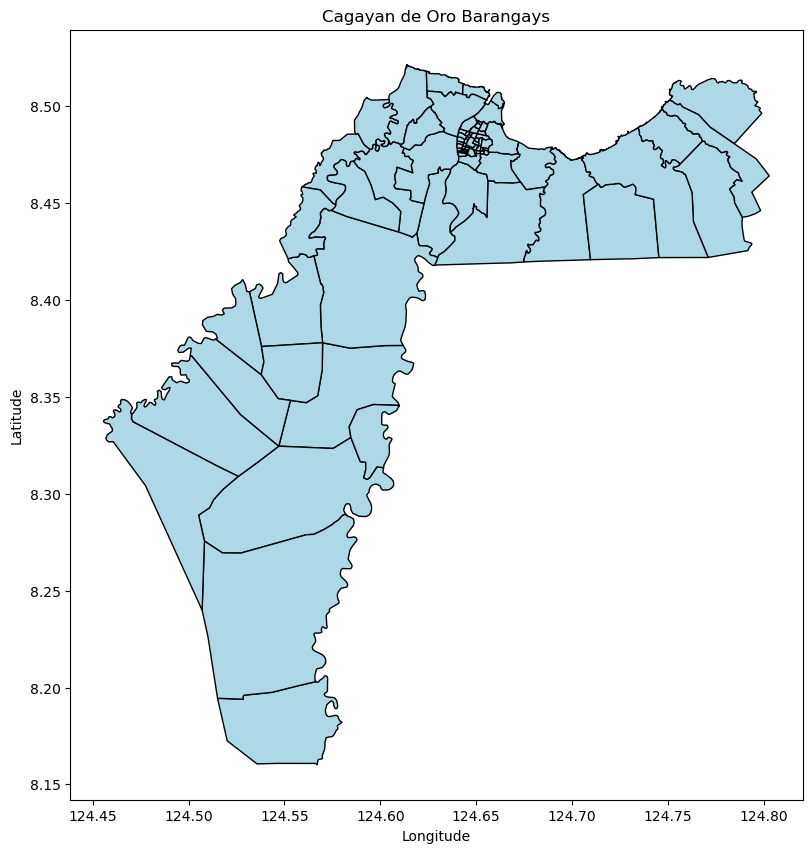

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
cdo_barangays.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Cagayan de Oro Barangays")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**Visualize the Study Area (Interactive)**

Using `Folium` an interactive map is created centered on Cagayan de Oro using its geographic coordinates. The barangay boundaries stored in `cdo_barangays` are overlaid onto this map as a GeoJSON layer. Each barangay polygon includes a tooltip that displays the barangay name when hovered over, enhancing user interaction and providing geographic context. This map serves as a foundational visualization for exploring spatial patterns related to Urban Heat Island prediction.

In [ ]:
# Create base map centered on CDO
map_cdo = folium.Map(location=[8.4803, 124.6498], zoom_start=10)

# Add barangays to the map
folium.GeoJson(
    cdo_barangays,
    name='Barangays',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['barangay'],
        aliases=['Barangay:'],
        localize=True
    )
).add_to(map_cdo)
map_cdo

**Select Areas Surrounding Cagayan de Oro City**

Since UHI is typically calculated by comparing the temperature of urban areas with that of surrounding rural areas, we need to select the areas that surround Cagayan de Oro City. The first step is to ensure that the *Philippines-wide barangay dataset* uses the WGS 84 coordinate reference system (EPSG:4326), aligning it with the previously filtered spatial data for Cagayan de Oro (CDO).

Next, the boundaries of Cagayan de Oro barangays are *merged into a single geometry*, which is then expanded by approximately 20 kilometers using a buffer to define a surrounding rural search zone. These geometries are *converted back into GeoDataFrames* to facilitate plotting and spatial operations.

Finally, barangays outside Cagayan de Oro that intersect with this buffer zone are identified as rural barangays, *isolating nearby areas* for potential comparative analysis or inclusion in the Urban Heat Island prediction study.

In [ ]:
# Ensure all GeoDataFrames use the same CRS
ph_barangays = ph_barangays.to_crs(epsg=4326)

# Create geometries with aligned CRS
cdo_boundary = cdo_barangays.union_all()
rural_search_zone = cdo_boundary.buffer(0.18)  # ~20km buffer in degrees

# Convert to GeoDataFrames for plotting
rural_zone_gdf = gpd.GeoDataFrame(geometry=[rural_search_zone], crs='EPSG:4326')
cdo_boundary_gdf = gpd.GeoDataFrame(geometry=[cdo_boundary], crs='EPSG:4326')

# Filter rural barangays (now with matching CRS)
rural_barangays = ph_barangays[
    (~ph_barangays['adm4_en'].isin(cdo_barangays['barangay'])) &
    (ph_barangays.geometry.intersects(rural_search_zone))
]

**Visualize the Rural Areas (Static)**

A plot is then created to visualize the rural barangays identified in the previous step. Using a figure sized for clarity, the rural barangays are displayed with light blue fill and black boundaries to distinguish their spatial extent.

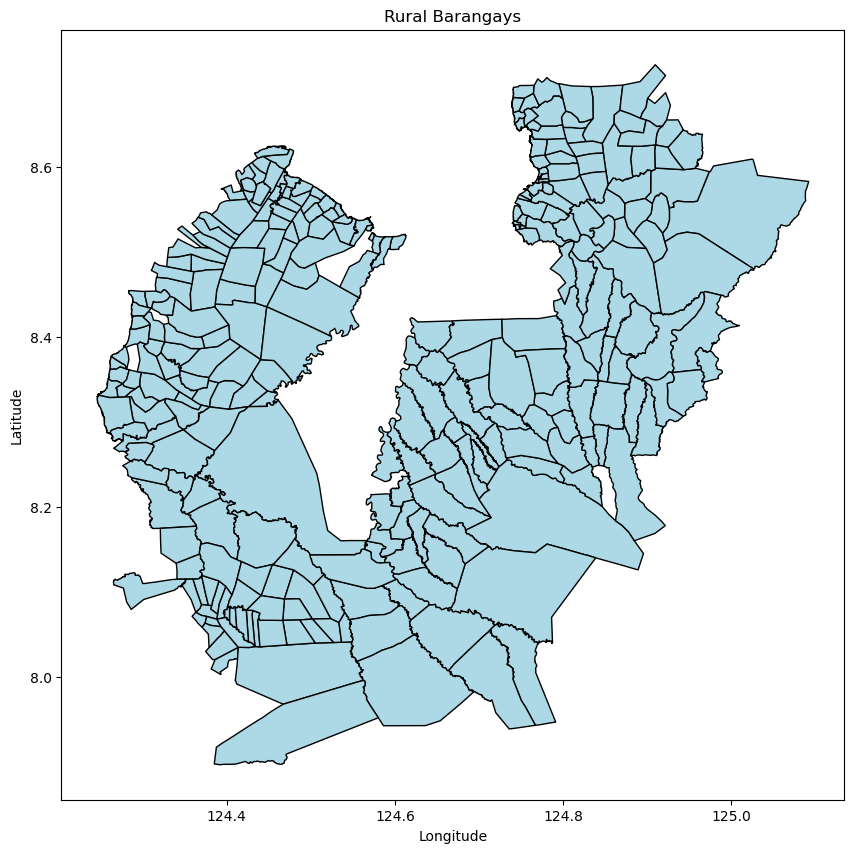

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
rural_barangays.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Rural Barangays")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**Visualize the Rural Areas (Interactive)**

An interactive map centered on Cagayan de Oro is created to visualize the surrounding rural barangays. The rural barangay boundaries are added as a GeoJSON layer, with tooltips configured to display each barangay’s name when hovered over. This map provides an interactive way to explore the spatial context of barangays neighboring Cagayan de Oro, supporting a more detailed understanding of the study area’s geographic environment.

In [ ]:
# Create base map centered on CDO
map_rural = folium.Map(location=[8.4803, 124.6498], zoom_start=10)

# Add barangays to the map
folium.GeoJson(
    rural_barangays,
    name='Barangays',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['adm4_en'],
        aliases=['Barangay:'],
        localize=True
    )
).add_to(map_rural)
map_rural

**Initialize Google Earth Engine API**

The *Earth Engine Python API* and the *geemap library* are used to enable cloud-based geospatial analysis within the Google Earth Engine environment.
*Authentication* is performed using a specified project ID to grant access to Earth Engine resources. The barangay datasets for Cagayan de Oro and the surrounding rural areas are then converted from GeoDataFrames into Earth Engine FeatureCollections, enabling their use in Earth Engine’s processing workflows and facilitating advanced spatial analysis at scale.

In [ ]:
# Authenticate and initialize using the Project ID
PROJECT_ID = "ml-final-project-457704"
ee.Authenticate()
ee.Initialize(project=PROJECT_ID)

# Convert to Earth Engine FeatureCollection
cdo_fc = geemap.geopandas_to_ee(cdo_barangays, geodesic=False)
rural_fc = geemap.geopandas_to_ee(rural_barangays, geodesic=False)

**Fetch Data from Google Earth Engine Collections**

The approach involves collecting, transforming, and aggregating a diverse set of environmental, meteorological, and remote sensing variables that influence surface temperature patterns and contribute to Urban Heat Island (UHI) dynamics.

These variables include:

**`Land Surface Temperature`**
- Derived from MODIS collection, LST indicates how hot the Earth's surface is. It provides the core signal for identifying heat differences between urban and rural areas, and we will use it to calculate the UHI index for each barangay.

**`Vegetation, Built-Up, and Water Indices (derived from Landsat)`**
- <u>NDVI (Normalized Difference Vegetation Index)</u>: Measures vegetation greenness; higher values generally indicate cooler areas due to evapotranspiration. *Greener areas with more vegetation usually stay cooler because plants release moisture into the air.*
- <u>NDBI (Normalized Difference Built-up Index)</u>: Highlights impervious surfaces like buildings and roads, typically associated with heat retention. *Urban surfaces like buildings and roads tend to trap and store heat.*
- <u>NDWI (Normalized Difference Water Index)</u>: Detects water bodies, which often exert a cooling effect on local temperatures. *Water bodies help cool the surrounding area by absorbing and slowly releasing heat.*

**`Topographic Features (from elevation data)`**
- <u>Elevation</u>: Higher altitudes typically exhibit cooler temperatures. *Temperatures usually drop as elevation increases due to thinner air and lower pressure.*
- <u>Slope</u>: Influences water runoff and solar exposure. *Steeper slopes can drain water faster and get different amounts of sunlight depending on their angle.*
- <u>Aspect</u>: The direction a slope faces, affecting sun exposure and microclimate conditions. *South-facing slopes (in the Northern Hemisphere) get more sun and are often warmer.*

**`Urban Structure Indicator`**
- <u>Built-up layer</u>: Represents human-made surfaces, used to capture spatial patterns of urbanization. *This shows how developed or urban an area is, which can impact local climate and heat retention.*

**`Atmospheric Pollution`**
- <u>NO₂</u>: Retrieved from satellite measurements, NO₂ levels reflect urban pollution, often correlated with human activity and temperature variations. *Higher NO₂ levels typically occur in busy, populated areas and can be linked to warmer urban temperatures.*

**`Surface Radiation Properties (from MERRA-2 Radiation Diagnostics)`**
- <u>Albedo</u>: Surface reflectance; lower values absorb more heat. *Darker surfaces with low albedo absorb more sunlight and heat up more.*
- <u>Net Radiation (SWGNT)</u>: Net incoming shortwave radiation. *This is the amount of sunlight energy actually absorbed by the Earth's surface after reflection.*
- <u>Incoming Shortwave Radiation (SWGDN)</u>: Total solar radiation received. *This measures the total sunlight energy reaching the Earth's surface from the sun.*
- <u>Radiation Ratio (SWGNT/SWGDN)</u>: Indicates surface energy absorption efficiency. *This shows how much of the incoming sunlight is being absorbed instead of reflected.*

**`Meteorological Variables (from MERRA-2 Single-Level Diagnostics)`**
-  <u>Air temperature (T2M)</u>: Near-surface air temperature. *This is the temperature of the air just above the ground, where we live and feel it.*
- <u>Dew point temperature (T2MDEW) and wet bulb temperature (T2MWET)</u>: Indicators of moisture and heat stress. *These help show how humid it feels and how the body experiences heat.*
- <u>Humidity (QV2M) and Precipitable Water (TQV)</u>: Reflect atmospheric moisture content. *These measure how much moisture is in the air, both near the ground and throughout the atmosphere.*
- <u>Surface Pressure (PS) and Skin Temperature (TS)</u>: Represent ground-level air pressure and surface skin temperature, respectively. *These show the weight of the air at ground level and how hot the Earth’s surface feels.*
- <u>Top of the Planetary Boundary Layer Pressure (PBLTOP) and Lifting Condensation Level (ZLCL)</u>: Indicate atmospheric mixing conditions. *These indicate how well the atmosphere mixes and at what height clouds may start to form.*
- <u>Temperature at 850 hPa (T850), Omega at 500 hPa (OMEGA500), and Geopotential Height at 500 hPa (H500)</u>: Upper atmosphere variables that help contextualize thermal and dynamic conditions. *These describe temperature, vertical motion, and pressure levels higher up in the atmosphere to help understand weather patterns.*

**`Anthropogenic Light Emissions`**
- <u>Nighttime lights (from VIIRS)</u>: Represent urban activity and development intensity, often correlated with heat retention. *Bright night lights indicate active, built-up areas that often stay warmer due to human activity and infrastructure.*

Technically, the workflow begins by initializing Google Earth Engine (GEE) image collections corresponding to each of the above variables. It defines two primary functions:

- `get_rural_reference`: Computes the mean rural LST over a given time period. This value acts as a baseline for quantifying UHI intensity by comparing it with urban LST values.
- `get_monthly_features`: Extracts monthly feature composites by filtering and processing image collections within the specified time window and spatial bounds (Cagayan de Oro). It applies scaling, calculates indices, aggregates mean values, and reduces the results over each barangay geometry to generate a spatially aligned feature set.

The main processing loop iterates over target years and months, calling `get_monthly_features` to build a monthly time series dataset. The UHI index is then computed by subtracting the rural baseline LST from each urban LST value, yielding a per-barangay measure of urban thermal anomaly.

The initial dataset is a temporally resolved, feature-rich representation of environmental drivers of UHI in Cagayan de Oro. It is structured for downstream analytical workflows, including statistical modeling or machine learning-based prediction of UHI patterns.

In [ ]:
# Initialize Earth Engine collections
modis_lst = ee.ImageCollection("MODIS/061/MOD11A2").select("LST_Day_1km") # Land Surface Temperature

landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") # Spectral Bands Indices

elevation = ee.Image("USGS/SRTMGL1_003").select("elevation") # Topographic Features
slope = ee.Terrain.slope(elevation).rename("slope")
aspect = ee.Terrain.aspect(elevation).rename("aspect")

built_up = ee.ImageCollection("JRC/GHSL/P2023A/GHS_BUILT_S").first().select("built_surface") # Urban Features

no2 = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_NO2").select("NO2_column_number_density") # Atmospheric Feature

merra2_rad = ee.ImageCollection("NASA/GSFC/MERRA/rad/2") # Surface Radiation Features

merra2 = ee.ImageCollection("NASA/GSFC/MERRA/slv/2") # Meteorological Features

viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG").select("avg_rad") # Nighttime Lights

In [ ]:
def get_rural_reference(start_date, end_date, rural_fc):
    """Calculate average rural LST for the time period.

    Args:
        start_date (ee.Date): Start date for filtering
        end_date (ee.Date): End date for filtering
        rural_fc (ee.FeatureCollection): Rural areas feature collection

    Returns:
        float: Mean LST value or None if no data available
    """
    # Get and process LST data
    filtered_lst = modis_lst.filterDate(start_date, end_date).map(
        lambda img: img.multiply(0.02).subtract(273.15)  # Convert to °C
    )

    # Calculate mean over rural areas
    rural_lst = filtered_lst.mean().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=rural_fc.geometry(),
        scale=1000,
        maxPixels=1e10
    )

    # Get the result and handle potential missing data
    result = rural_lst.getInfo()
    return result.get('LST_Day_1km', None)

def get_monthly_features(year, month, cdo_fc, rural_fc):
    """Extract and process all monthly features for UHI analysis in a single function.

    Args:
        year (int): Year to process
        month (int): Month to process (1-12)
        cdo_fc (ee.FeatureCollection): Urban areas feature collection
        rural_fc (ee.FeatureCollection): Rural areas feature collection

    Returns:
        ee.FeatureCollection: Processed features or None if error occurs
    """
    start = ee.Date.fromYMD(year, month, 1)
    end = start.advance(1, "month")

    try:
        # Land Surface Temperature
        monthly_lst = modis_lst.filterDate(start, end).map(
            lambda img: img.multiply(0.02).subtract(273.15)
        )

        if monthly_lst.size().getInfo() == 0:
            print(f"No LST data for {year}-{month}")
            return None

        feature_img = monthly_lst.mean().rename('LST')

        # Vegetation, Built-up, & Water Indices
        try:
            landsat_img = landsat.filterDate(start, end).filterBounds(cdo_fc)
            if landsat_img.size().getInfo() > 0:
                median_composite = landsat_img.select(['SR_B[2-7]']).median()
                scaled_composite = median_composite.multiply(0.0000275).add(-0.2)

                ndvi = scaled_composite.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
                ndbi = scaled_composite.normalizedDifference(['SR_B6', 'SR_B5']).rename('NDBI')
                ndwi = scaled_composite.normalizedDifference(['SR_B3', 'SR_B5']).rename('NDWI')

                feature_img = feature_img.addBands(ndvi)
                feature_img = feature_img.addBands(ndbi)
                feature_img = feature_img.addBands(ndwi)
        except Exception as e:
            print(f"Error processing Landsat: {str(e)}")

        # Topographic Features
        feature_img = feature_img.addBands(elevation)
        feature_img = feature_img.addBands(slope)
        feature_img = feature_img.addBands(aspect)

        # Urban Structure Indicator
        try:
            built_up_img = built_up.rename('built_up')
            feature_img = feature_img.addBands(built_up_img)
        except Exception as e:
            print(f"Error processing built-up: {e}")

        # Atmospheric Pollution
        try:
            monthly_no2 = no2.filterDate(start, end).mean().rename("NO2")
            feature_img = feature_img.addBands(monthly_no2)
        except Exception as e:
            print(f"Error processing NO2: {e}")

        # Surface Radiation Properties
        try:
            rad = merra2_rad.filterDate(start, end)
            if rad.size().getInfo() > 0:
                mean_rad = rad.mean()
                albedo = mean_rad.select('ALBEDO').divide(100).rename('albedo')
                net_radiation = mean_rad.select('SWGNT').rename('net_radiation')
                incoming_sw = mean_rad.select('SWGDN').rename('incoming_sw')
                radiation_ratio = ee.Image().expression(
                    'SWGDN != 0 ? SWGNT/SWGDN : 0',
                    {'SWGNT': net_radiation, 'SWGDN': incoming_sw}
                ).rename('radiation_ratio')

                feature_img = feature_img.addBands(albedo)
                feature_img = feature_img.addBands(net_radiation)
                feature_img = feature_img.addBands(incoming_sw)
                feature_img = feature_img.addBands(radiation_ratio)
        except Exception as e:
            print(f"Error processing surface properties: {e}")

        # Meteorological Variables
        try:
            merra = merra2.filterDate(start, end)

            # Temperature features
            feature_img = feature_img.addBands(merra.select('T2M').mean().subtract(273.15).rename('temp_2m'))
            feature_img = feature_img.addBands(merra.select('T2MDEW').mean().subtract(273.15).rename('temp_dew'))
            feature_img = feature_img.addBands(merra.select('T2MWET').mean().subtract(273.15).rename('temp_wet'))

            # Humidity features
            feature_img = feature_img.addBands(merra.select('QV2M').mean().multiply(1000).rename('humidity'))
            feature_img = feature_img.addBands(merra.select('TQV').mean().rename('precipitable_water'))

            # Surface properties
            feature_img = feature_img.addBands(merra.select('PS').mean().divide(100).rename('surface_pressure'))
            feature_img = feature_img.addBands(merra.select('TS').mean().subtract(273.15).rename('skin_temp'))

            # Boundary layer
            feature_img = feature_img.addBands(merra.select('PBLTOP').mean().divide(100).rename('pbl_pressure'))
            feature_img = feature_img.addBands(merra.select('ZLCL').mean().rename('lc_level'))

            # Upper atmosphere
            feature_img = feature_img.addBands(merra.select('T850').mean().subtract(273.15).rename('temp_850'))
            feature_img = feature_img.addBands(merra.select('OMEGA500').mean().rename('omega_500'))
            feature_img = feature_img.addBands(merra.select('H500').mean().rename('geopot_500'))
        except Exception as e:
            print(f"Error processing weather features: {e}")

        # Anthropogenic Light Emissions
        try:
            viirs_monthly = viirs.filterDate(start, end).mean().rename('nighttime_lights')
            viirs_cleaned = viirs_monthly.updateMask(viirs_monthly.lt(500))
            feature_img = feature_img.addBands(viirs_cleaned)
        except Exception as e:
            print(f"Error processing nighttime lights: {e}")

        # Reduce over each barangay
        stats = feature_img.reduceRegions(
            collection=cdo_fc,
            reducer=ee.Reducer.mean(),
            scale=100)

        return stats.set('year', year).set('month', month)

    except Exception as e:
        print(f"Error processing monthly features: {e}")
        return None

In [ ]:
def main(years, cdo_fc, rural_fc):
    """Main function to process UHI analysis for given years.

    Args:
        years (list): List of years to process
        cdo_fc (ee.FeatureCollection): Urban areas feature collection
        rural_fc (ee.FeatureCollection): Rural areas feature collection

    Returns:
        pd.DataFrame: Processed data or None if no data was processed
    """
    features = []

    for year in years:
        for month in range(1, 13):
            try:
                result = get_monthly_features(year, month, cdo_fc, rural_fc)
                if result:
                    result_info = result.getInfo()
                    if 'features' in result_info:
                        for f in result_info['features']:
                            data = f['properties']
                            data['year'] = year
                            data['month'] = month
                            features.append(data)
            except Exception as e:
                print(f"Major error processing {year}-{month}: {e}")

    # Post-processing
    if features:
        df = pd.DataFrame(features)

        # Calculate UHI index using the rural reference
        start_date = ee.Date.fromYMD(years[0], 1, 1)
        end_date = ee.Date.fromYMD(years[-1], 12, 31)

        reference_lst = get_rural_reference(start_date, end_date, rural_fc)

        if reference_lst is not None:
            df['UHI_index'] = df['LST'] - reference_lst
            print(f"Successfully processed {len(df)} records.")
        return df

    print("No data was processed. Check the error messages above.")
    return None

# Extract data from 2019-2024
years = [2019, 2020, 2021, 2022, 2023, 2024]
result_df = main(years, cdo_fc, rural_fc)
result_df

Successfully processed 5760 records.


LST      NDBI      NDVI      NDWI       NO2    albedo      aspect  \
0     29.290395 -0.263989  0.612061 -0.569534  0.000045  0.001405  202.139101   
1     30.736984 -0.221422  0.418105 -0.400351  0.000046  0.001405  170.988294   
2     32.639460 -0.209558  0.378564 -0.372386  0.000047  0.001194  169.072099   
3     29.502607 -0.219035  0.594943 -0.564952  0.000044  0.001405  167.129219   
4     33.954339 -0.150107  0.351085 -0.355485  0.000048  0.001405  120.533812   
...         ...       ...       ...       ...       ...       ...         ...   
5755  34.585066 -0.108554  0.275266 -0.296937  0.000047  0.001364  162.491731   
5756  33.934750 -0.110539  0.210368 -0.233715  0.000047  0.001364  147.816460   
5757  33.652445 -0.099577  0.195170 -0.220222  0.000047  0.001364  137.423012   
5758  33.530000 -0.126513  0.228820 -0.247403  0.000047  0.001364  147.522090   
5759  34.054691 -0.115953  0.220558 -0.252062  0.000047  0.001364  126.497722   

         barangay     built_up   elevation   geopot_500   humidity  \
0          Agusan   232.909971  102.466714  5875.571289  15.795803   
1       Baikingon    26.780947   34.835039  5875.571289  15.795803   
2           Bulua   953.135518   14.081779  5876.253832  16.781142   
3         Balubal     3.048871  307.374349  5875.571289  15.795803   
4        Balulang   720.703598   61.067839  5875.571289  15.795803   
...           ...          ...         ...          ...        ...   
5755  Barangay 29  3352.504576    8.455562  5875.454102  17.596232   
5756  Barangay 31  3768.049267    6.507475  5875.454102  17.596232   
5757  Barangay 35  4686.914969    6.503100  5875.454102  17.596232   
5758  Barangay 36  3902.051992    8.270088  5875.454102  17.596232   
5759  Barangay 37  4501.525773    7.893041  5875.454102  17.596232   

      incoming_sw    lc_level  net_radiation  nighttime_lights  omega_500  \
0      213.838516  587.922180     187.203354          3.146500  -0.021638   
1      213.838516  587.922180     187.203354          0.693141  -0.021638   
2      214.442754  597.001981     192.392247          9.854778  -0.033373   
3      213.838516  587.922180     187.203354          0.559192  -0.021638   
4      213.838516  587.922180     187.203354          6.484680  -0.021638   
...           ...         ...            ...               ...        ...   
5755   162.665863  582.360718     142.399979         39.104614  -0.167509   
5756   162.665863  582.360718     142.399979         33.603772  -0.167509   
5757   162.665863  582.360718     142.399979         36.580002  -0.167509   
5758   162.665863  582.360718     142.399979         36.580002  -0.167509   
5759   162.665863  582.360718     142.399979         36.580002  -0.167509   

      pbl_pressure  precipitable_water  radiation_ratio  skin_temp      slope  \
0       880.034609           38.025070         0.875443  22.790399  13.077934   
1       880.034609           38.025070         0.875443  22.790399   5.984438   
2       900.578549           41.085038         0.897131  24.465456   2.883020   
3       880.034609           38.025070         0.875443  22.790399  15.119206   
4       880.034609           38.025070         0.875443  22.790399   5.139346   
...            ...                 ...              ...        ...        ...   
5755    886.827422           50.623138         0.875414  23.972498   1.653510   
5756    886.827422           50.623138         0.875414  23.972498   1.591607   
5757    886.827422           50.623138         0.875414  23.972498   0.962578   
5758    886.827422           50.623138         0.875414  23.972498   1.948749   
5759    886.827422           50.623138         0.875414  23.972498   1.793438   

      surface_pressure    temp_2m   temp_850   temp_dew   temp_wet  year  \
0           943.815625  22.503442  16.976038  20.196313  20.196008  2019   
1           943.815625  22.503442  16.976038  20.196313  20.196008  2019   
2           970.130898  23.986870  16.675048  21.614383  21.614350  2019

### **5.2 Data Exploration (Exploratory Data Analysis)**

**Check for Null Values**

In [ ]:
result_df.isnull().sum()

LST                   27
NDBI                  80
NDVI                  80
NDWI                  80
NO2                    0
albedo                 0
aspect                 0
barangay               0
built_up               0
elevation              0
geopot_500             0
humidity               0
incoming_sw            0
lc_level               0
net_radiation          0
nighttime_lights       0
omega_500              0
pbl_pressure           0
precipitable_water     0
radiation_ratio        0
skin_temp              0
slope                  0
surface_pressure       0
temp_2m                0
temp_850               0
temp_dew               0
temp_wet               0
year                   0
month                  0
UHI_index             27
dtype: int64

**Check Data Availability for All Barangays**

In [ ]:
barangays_with_data = result_df['barangay'].unique()
print(f"Total barangays with any data: {len(barangays_with_data)}")

Total barangays with any data: 80


**Check Data Types**

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LST                 5733 non-null   float64
 1   NDBI                5680 non-null   float64
 2   NDVI                5680 non-null   float64
 3   NDWI                5680 non-null   float64
 4   NO2                 5760 non-null   float64
 5   albedo              5760 non-null   float64
 6   aspect              5760 non-null   float64
 7   barangay            5760 non-null   object 
 8   built_up            5760 non-null   float64
 9   elevation           5760 non-null   float64
 10  geopot_500          5760 non-null   float64
 11  humidity            5760 non-null   float64
 12  incoming_sw         5760 non-null   float64
 13  lc_level            5760 non-null   float64
 14  net_radiation       5760 non-null   float64
 15  nighttime_lights    5760 non-null   float64
 16  omega_

**General Statistic**

In [ ]:
result_df.describe()

LST         NDBI         NDVI         NDWI          NO2  \
count  5733.000000  5680.000000  5680.000000  5680.000000  5760.000000   
mean     34.302665    -0.170927     0.338984    -0.340431     0.000048   
std       3.703900     0.139716     0.203711     0.178649     0.000004   
min      22.815531    -0.639749     0.014012    -0.816572     0.000034   
25%      31.632902    -0.286121     0.180764    -0.487995     0.000046   
50%      35.170000    -0.163645     0.271143    -0.291114     0.000048   
75%      37.077936    -0.060478     0.499299    -0.210710     0.000050   
max      41.956667     0.134212     0.892936    -0.007963     0.000063   

            albedo       aspect     built_up    elevation   geopot_500  \
count  5760.000000  5760.000000  5760.000000  5760.000000  5760.000000   
mean      0.001340   162.969474  2108.673945    80.914674  5871.612436   
std       0.000080    33.824345  1755.509012   139.842460    10.761560   
min       0.000989    69.502463     1.743508     3.166927  5853.213867   
25%       0.001341   142.717939   168.317779     7.368371  5863.169922   
50%       0.001354   163.152825  1962.920615    11.341144  5870.750977   
75%       0.001372   183.769709  3847.301064    73.302213  5879.735840   
max       0.001455   263.284481  4751.609694   743.033669  5900.077637   

          humidity  incoming_sw     lc_level  net_radiation  nighttime_lights  \
count  5760.000000  5760.000000  5760.000000    5760.000000       5760.000000   
mean     16.915604   206.413708   699.661267     181.631133         14.896747   
std       0.775385    34.462485    88.142949      30.648441         13.683154   
min      14.126935   127.452301   501.974762     116.106827          0.000000   
25%      16.633553   185.812012   645.659790     163.246488          0.718936   
50%      17.011773   197.227371   691.830261     173.126785         10.976115   
75%      17.344411   217.068054   747.303406     194.697052         27.670304   
max      19.423384   292.722137  1059.852841     262.625275         51.856450   

         omega_500  pbl_pressure  precipitable_water  radiation_ratio  \
count  5760.000000   5760.000000         5760.000000      5760.000000   
mean     -0.086343    875.545505           45.760635         0.879761   
std       0.084386     12.291054            6.079949         0.007881   
min      -0.332521    853.208750           24.009077         0.873548   
25%      -0.146757    867.020469           42.534456         0.876021   
50%      -0.077859    873.117891           47.234539         0.877356   
75%      -0.020102    881.431094           49.800388         0.879937   
max       0.054171    929.757500           58.628063         0.917128   

         skin_temp        slope  surface_pressure      temp_2m     temp_850  \
count  5760.000000  5760.000000       5760.000000  5760.000000  5760.000000   
mean     24.615120     5.160559        945.852314    24.302070    18.459277   
std       1.122126     4.917338         10.036057     0.980909     0.612049   
min      22.494806     0.962578        940.701094    22.026788    15.492670   
25%      23.981927     1.600846        942.030625    23.764276    18.151147   
50%      24.510126     2.392996        942.582656    24.263086    18.565393   
75%      24.844293     8.637736        943.682031    24.628748    18.831812   
max      29.374957    16.273091        990.134922    28.546074    19.843744   

          temp_dew     temp_wet         year        month    UHI_index  
count  5760.000000  5760.000000  5760.000000  5760.000000  5733.000000  
mean     21.326481    21.326464  2021.500000     6.500000     6.315561  
std       0.845803     0.845787     1.707973     3.452352     3.703900  
min      18.433679    18.433771  2019.000000     1.000000    -5.171573  
25%      21.014753    21.015035  2020.000000     3.750000     3.645798  
50%      21.383905    21.383997  2021.500000     6.500000     7.182896  
75%      21.711542    21.711084  2023.000000     9.250000     9.090832

#### **From Peaks to Declines: What Defined LST Dynamics from 2019 to 2024?**

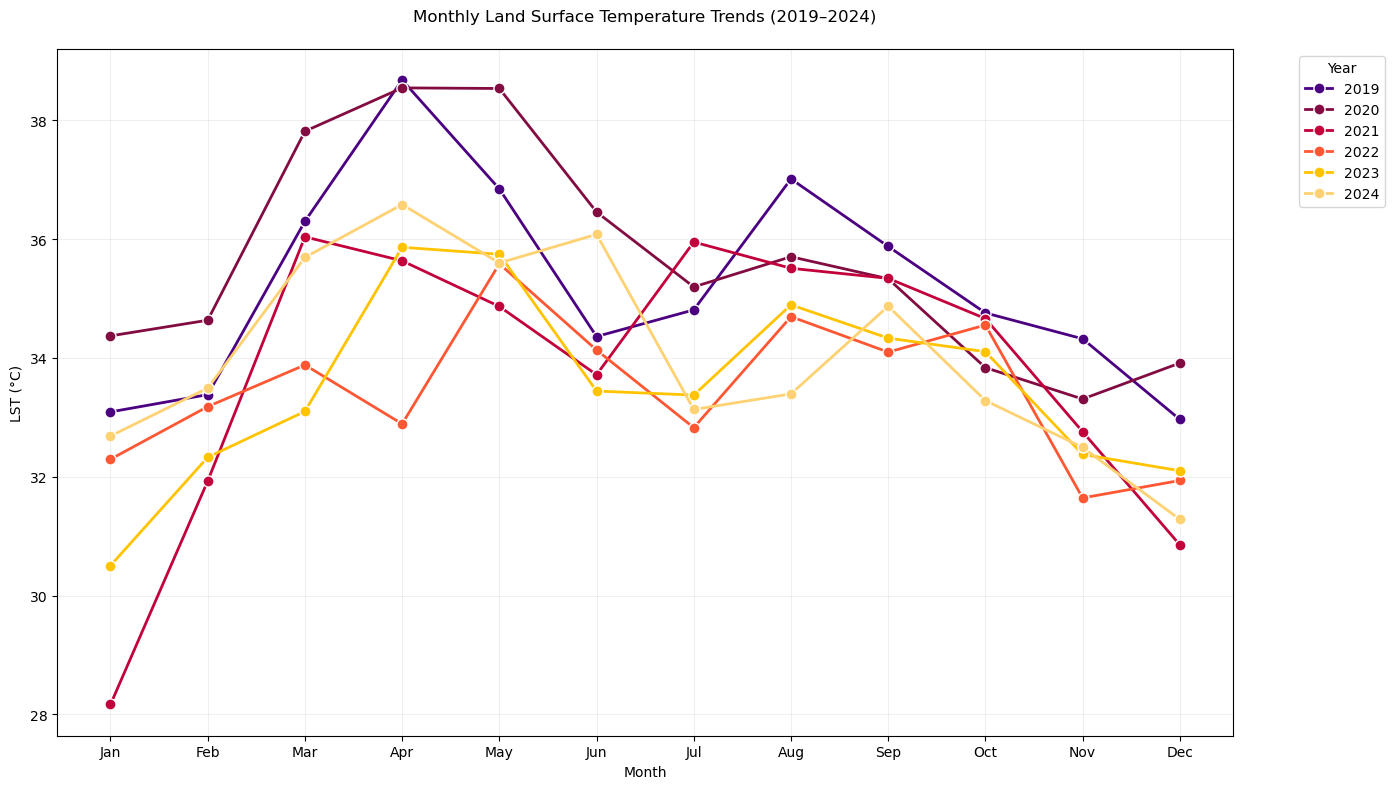

In [ ]:
# Prepare data - monthly averages for each year
monthly_avg = result_df.groupby(['year', 'month'])['LST'].mean().unstack().T
monthly_avg.columns = monthly_avg.columns.astype(str)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Custom color palette
custom_colors = ['#4B0082', '#820C42', '#C2003C', '#FF5733', '#FFC300', '#FED172']

# Plot
plt.figure(figsize=(14, 8))

for i, year in enumerate(monthly_avg.columns):
    color = custom_colors[i % len(custom_colors)]
    plt.plot(month_names, monthly_avg[year],
             marker='o', linewidth=2, markersize=8,
             color=color, label=year,
             markeredgecolor='white', markeredgewidth=1)

# Formatting
plt.title('Monthly Land Surface Temperature Trends (2019–2024)', pad=20)
plt.xlabel('Month')
plt.ylabel('LST (°C)')
plt.grid(alpha=0.2)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Land Surface Temperature (LST**) is a critical metric in environmental studies, particularly for assessing Urban Heat Island (UHI) effects. Analyzing monthly LST trends from 2019 to 2024 reveals consistent seasonal patterns and notable fluctuations.

The *highest recorded LST occurred in 2019, peaking at 38°C,* suggesting an extreme heat event during that year. Across all years, the data exhibits a similar cyclical pattern: temperatures begin at moderate or lower levels in January, rise and fluctuate from February through August, and then decline steadily from September onward.

This trend aligns closely with the *climatic seasons of the Philippines*. The initial rise in temperature from February corresponds with the onset of the dry season, characterized by increased solar radiation and reduced cloud cover. The fluctuations observed between February and August likely reflect intermittent weather disturbances, such as tropical cyclones or monsoon rains, which temporarily lower temperatures. The consistent decline after August marks the transition to the rainy season, where frequent precipitation and cloudiness contribute to cooler surface temperatures.

#### **Spatial Patterns of Urban Heat Island Drivers (NDVI, NDBI, NDWI, LST)**

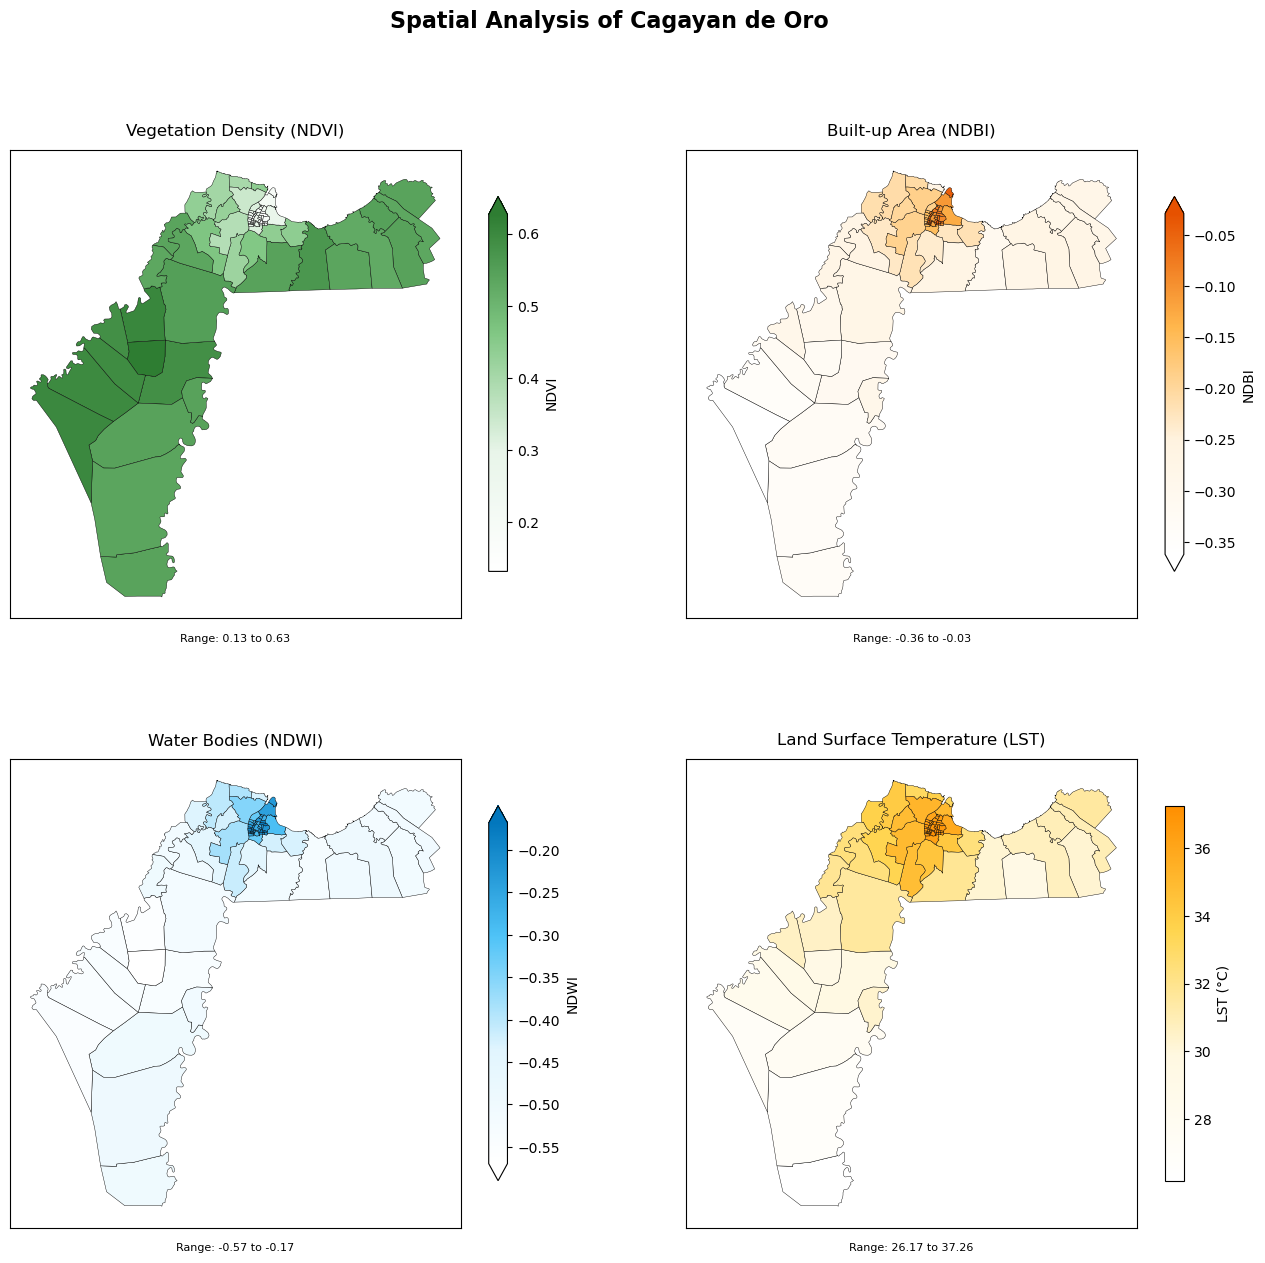

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np
from matplotlib.gridspec import GridSpec

def create_index_subplot(ax, gdf, index_name, colors, title):
    """Create a standardized high-contrast subplot for spatial indices"""

    merged_gdf = cdo_barangays.merge(
        result_df.groupby('barangay')[index_name].mean().reset_index(),
        on='barangay',
        how='left'
    )

    cmap = mcolors.LinearSegmentedColormap.from_list(f"high_contrast_{index_name.lower()}", colors)

    index_data = merged_gdf[index_name].dropna()

    if index_name == 'NDVI':
        vmin = max(index_data.min(), 0)  # For vegetation, start from 0
        vmax = index_data.max()
        extend = 'both' if index_data.min() < 0 else 'max'
        legend_label = 'NDVI'
    elif index_name == 'NDBI':
        vmin = index_data.min()
        vmax = index_data.max()
        extend = 'both'
        legend_label = 'NDBI'
    elif index_name == 'NDWI':
        vmin = index_data.min()
        vmax = index_data.max()
        extend = 'both'
        legend_label = 'NDWI'
    elif index_name == 'LST':
        vmin = index_data.min()
        vmax = index_data.max()
        extend = 'neither'
        legend_label = 'LST (°C)'
    else:
        vmin = index_data.min()
        vmax = index_data.max()
        extend = 'both'
        legend_label = index_name

    merged_gdf.plot(
        column=index_name,
        cmap=cmap,
        ax=ax,
        edgecolor='black',
        linewidth=0.3,
        vmin=vmin,
        vmax=vmax,
        missing_kwds={'color': 'lightgray', 'hatch': '//'}
    )

    cbar = plt.colorbar(
        ScalarMappable(norm=plt.Normalize(vmin, vmax), cmap=cmap),
        ax=ax,
        extend=extend,
        shrink=0.8
    )
    cbar.set_label(legend_label, fontsize=10)

    ax.set_title(title, fontsize=12, pad=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    ax.annotate(f'Range: {vmin:.2f} to {vmax:.2f}',
               xy=(0.5, -0.05), xycoords='axes fraction',
               ha='center', fontsize=8)

    return ax

# Create a 2x2 subplot figure
fig = plt.figure(figsize=(16, 14))
gs = GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.3)

# Define color schemes
ndvi_colors = ["#FFFFFF", "#E8F5E9", "#81C784", "#2E7D32"]  # White -> Green
ndbi_colors = ["#FFFFFF", "#FFF3E0", "#FFB74D", "#E65100"]  # White -> Orange
ndwi_colors = ["#FFFFFF", "#E1F5FE", "#4FC3F7", "#0277BD"]  # White -> Blue
lst_colors = ["#FFFFFF", "#FFF8E1", "#FFD54F", "#FF8F00"]   # White -> Yellow-Orange

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Generate each plot
create_index_subplot(ax1, cdo_barangays, 'NDVI', ndvi_colors, "Vegetation Density (NDVI)")
create_index_subplot(ax2, cdo_barangays, 'NDBI', ndbi_colors, "Built-up Area (NDBI)")
create_index_subplot(ax3, cdo_barangays, 'NDWI', ndwi_colors, "Water Bodies (NDWI)")
create_index_subplot(ax4, cdo_barangays, 'LST', lst_colors, "Land Surface Temperature (LST)")

fig.suptitle('Spatial Analysis of Cagayan de Oro', fontsize=16, fontweight='bold', y=0.98)

plt.show()

In the model we will create, these shown features play a significant role especially in feature engineering. These features will *help in predicting the UHI index*, but this time we will try to look at them in their individual natures. The spatial analysis of Cagayan de Oro reveals distinct environmental and urban development patterns across the city.

> Looking at `vegetation density (NDVI)`, the values range from 0.13 to 0.63, showing that the city maintains significant green cover, particularly in the western and southern regions where darker green indicates denser vegetation. *The northeastern areas display lighter green, suggesting less vegetation, which likely corresponds to more developed urban zones.*

> The `built-up area index (NDBI)` ranges from -0.36 to -0.03, with most of the city showing very light orange or white coloration, indicating relatively low built-up density across much of the area. However, there's a notable concentration of darker orange in a small area of the north-central region, suggesting a more intensely developed urban core. *This pattern is consistent with typical urban development where construction is concentrated in specific commercial or municipal centers.*

> The `water bodies map (NDWI)` with values ranging from -0.57 to -0.17 shows predominantly light blue coloration throughout most of the city, indicating limited surface water presence. *However, a distinct dark blue area in the north-central region stands out, corresponding to what is likely the Cagayan River or another significant water body.* The light blue shading elsewhere suggests some moisture presence but not substantial water features.

> `Land surface temperature (LST)` varies from 26.17°C to 37.26°C across the city, with a notable pattern that strongly correlates with the built-up areas. *The warmest temperatures (yellow-orange) appear in the same north-central region where NDBI values are highest, clearly demonstrating the urban heat island effect*. Meanwhile, areas with higher vegetation show cooler temperatures, illustrating the cooling effect of green spaces. This temperature variation of over 11°C across the city underscores the significant impact of land cover types on local climate conditions.

The clear inverse relationship between vegetation density and surface temperature highlights the importance of green spaces for urban climate regulation in this tropical city.

#### **Urban Heat Island Drivers vs UHI Index**

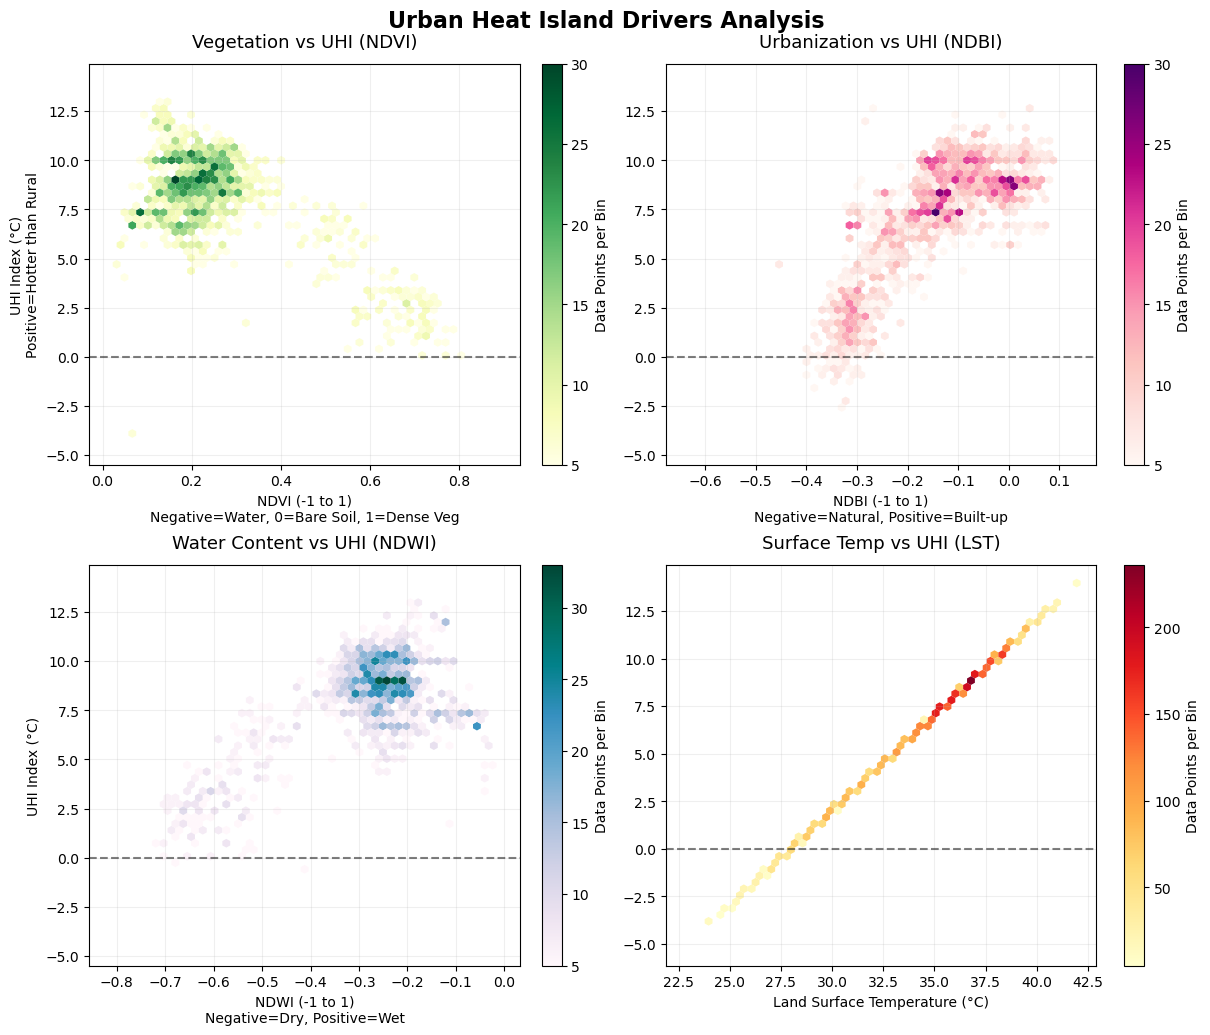

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10),
                        constrained_layout=True)

gridsize = 50
mincnt = 5

# 1. NDVI vs UHI (Vegetation)
hex1 = axes[0,0].hexbin(result_df['NDVI'], result_df['UHI_index'],
                       gridsize=gridsize, cmap='YlGn', mincnt=mincnt,
                       edgecolors='none')
axes[0,0].set_title('Vegetation vs UHI (NDVI)', pad=12, fontsize=13)
axes[0,0].set_xlabel('NDVI (-1 to 1)\nNegative=Water, 0=Bare Soil, 1=Dense Veg')
axes[0,0].set_ylabel('UHI Index (°C)\nPositive=Hotter than Rural')
cb1 = fig.colorbar(hex1, ax=axes[0,0])
cb1.set_label('Data Points per Bin')

# 2. NDBI vs UHI (Built-up)
hex2 = axes[0,1].hexbin(result_df['NDBI'], result_df['UHI_index'],
                       gridsize=gridsize, cmap='RdPu', mincnt=mincnt,
                       edgecolors='none')
axes[0,1].set_title('Urbanization vs UHI (NDBI)', pad=12, fontsize=13)
axes[0,1].set_xlabel('NDBI (-1 to 1)\nNegative=Natural, Positive=Built-up')
axes[0,1].set_ylabel('')
cb2 = fig.colorbar(hex2, ax=axes[0,1])
cb2.set_label('Data Points per Bin')

# 3. NDWI vs UHI (Water)
hex3 = axes[1,0].hexbin(result_df['NDWI'], result_df['UHI_index'],
                       gridsize=gridsize, cmap='PuBuGn', mincnt=mincnt,
                       edgecolors='none')
axes[1,0].set_title('Water Content vs UHI (NDWI)', pad=12, fontsize=13)
axes[1,0].set_xlabel('NDWI (-1 to 1)\nNegative=Dry, Positive=Wet')
axes[1,0].set_ylabel('UHI Index (°C)')
cb3 = fig.colorbar(hex3, ax=axes[1,0])
cb3.set_label('Data Points per Bin')

# 4. LST vs UHI (Temperature)
hex4 = axes[1,1].hexbin(result_df['LST'], result_df['UHI_index'],
                       gridsize=gridsize, cmap='YlOrRd', mincnt=mincnt,
                       edgecolors='none')
axes[1,1].set_title('Surface Temp vs UHI (LST)', pad=12, fontsize=13)
axes[1,1].set_xlabel('Land Surface Temperature (°C)')
axes[1,1].set_ylabel('')
cb4 = fig.colorbar(hex4, ax=axes[1,1])
cb4.set_label('Data Points per Bin')

for ax in axes.flat:
    ax.axhline(0, color='black', linestyle='--', alpha=0.5)  # UHI baseline
    ax.grid(alpha=0.2)

fig.suptitle('Urban Heat Island Drivers Analysis',
             y=1.02, fontsize=16, weight='bold')
plt.show()

In this plot, we inspect the patterns of our dataset by examining *how each environmental index relates to the Urban Heat Island (UHI) intensity* in Cagayan de Oro, with particular emphasis on data density distributions.

This visualization provides a comprehensive analysis of the relationships between various environmental indicators and UHI effects, *helping us understand where the majority of our data points cluster across these environmental gradients.*

> `Vegetation vs UHI` - reveals an informative data density pattern where the highest concentration of measurements (shown by the darkest green hexbins) occurs in the NDVI range of 0.1-0.3 with UHI values between 7.5-10°C. This density distribution indicates that moderate vegetation areas dominate the urban landscape and experience significant heat island effects. The gradient from yellow to green effectively visualizes how data density decreases as we move toward areas with very high vegetation (NDVI > 0.6), which *show much lower UHI values (0-5°C) but represent a smaller portion of the dataset.*

> `Urbanization vs UHI` - displays not just a correlation but a clear data density pattern, with the greatest concentration of points (darkest purple hexbins) clustered in the moderately urbanized range (NDBI -0.1 to 0.1) with UHI values between 7.5-10°C. This density distribution shows that the majority of the study area consists of moderately to highly urbanized surfaces that contribute significantly to heat island effects. *The lower data density in the negative NDBI regions (lighter pink hexbins) indicates that naturally-dominated surfaces are less common in the study area.*

> `Water Content vs UHI` - shows a striking data density pattern with a pronounced concentration of measurements (dark blue-green hexbins) around NDWI values of -0.2 to -0.1 and UHI values of 8-10°C. This dense clustering reveals that the majority of the urban area experiences limited water content conditions, likely contributing to elevated urban temperatures. *The sparse distribution of hexbins in other regions of the plot indicates that areas with higher water content are much less common in the dataset.*

> `Surface Temp vs UHI` - displays a data density gradient along the linear relationship between LST and UHI values, with the highest concentration of measurements (dark red hexbins) occurring at temperatures between 35-40°C corresponding to UHI values of 7.5-10°C. The density distribution shows how surface temperatures are concentrated within this range throughout the study area, with progressively fewer measurements at the temperature extremes as indicated by the lighter yellow hexbins.


**Check for Correlation**

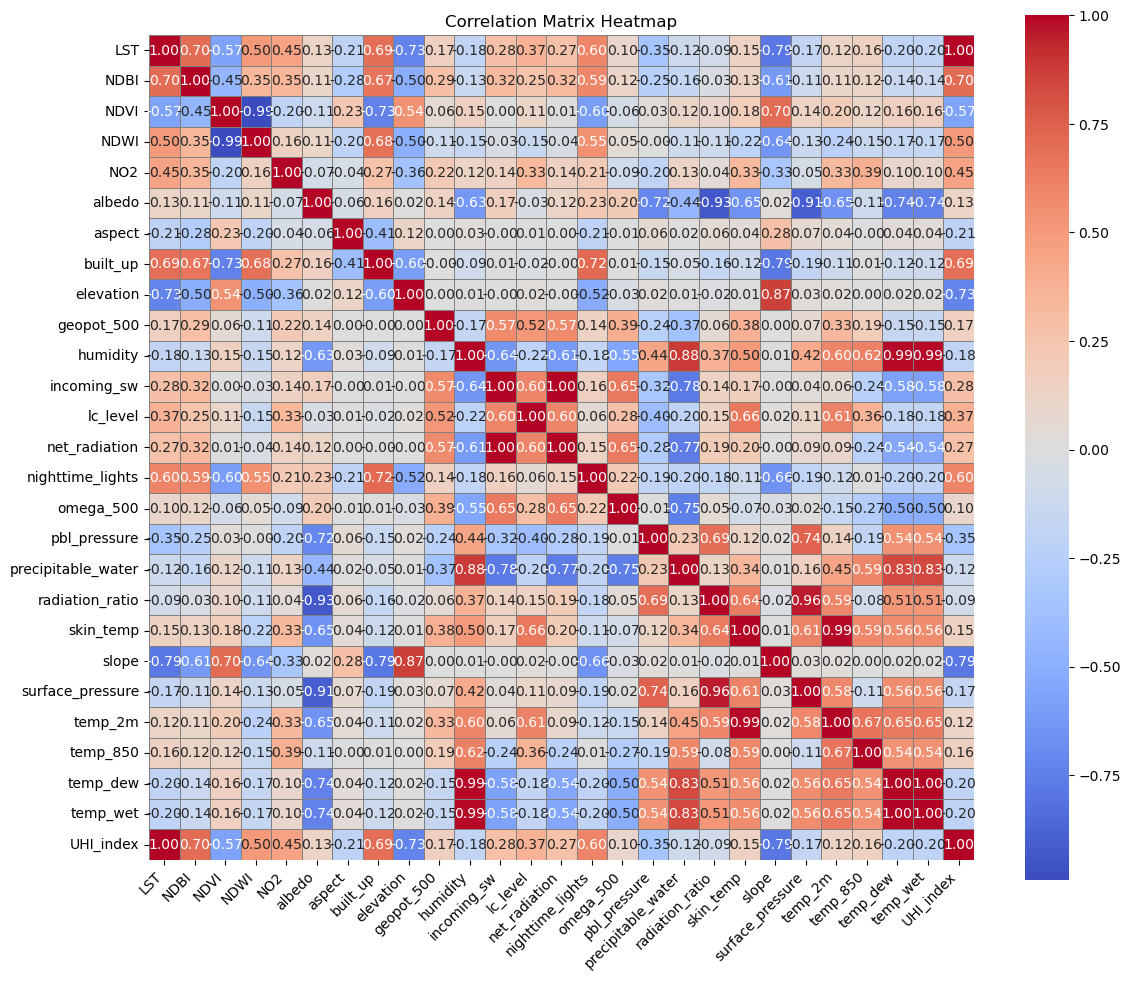

In [ ]:
# Drop unwanted columns
result_df = result_df.drop(columns=['barangay', 'year', 'month'])

# Calculate correlation matrix
corr_matrix = result_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

This correlation matrix reveals key relationships driving urban heat island effects in Cagayan de Oro.

- `Urbanization indicators (NDBI, built_up)` strongly contribute to heating (0.70, 0.69).
- `Vegetation (NDVI)` moderately reduces urban heat (-0.57), and
- Topographical features like `elevation` and `slope` show significant cooling effects (-0.75, -0.79).
- Water-related factors `(NDWI, humidity)` provide some cooling benefit (-0.50, -0.18).

These correlations explain the data density patterns observed in hexbin plots, where the majority of the city experiences moderate vegetation, significant urbanization, limited water content, and consequently elevated temperatures, providing valuable insights for urban heat mitigation planning.

### **5.3 Data Preparation**

**Remove Null Values**

The presence of null values can hinder both data analysis and model training. However, since the proportion of missing values is relatively low (less than 30%) for each feature, the most appropriate approach is to remove these entries from the dataset.

In [ ]:
result_df = result_df.dropna()
result_df.isnull().sum()

LST                   0
NDBI                  0
NDVI                  0
NDWI                  0
NO2                   0
albedo                0
aspect                0
built_up              0
elevation             0
geopot_500            0
humidity              0
incoming_sw           0
lc_level              0
net_radiation         0
nighttime_lights      0
omega_500             0
pbl_pressure          0
precipitable_water    0
radiation_ratio       0
skin_temp             0
slope                 0
surface_pressure      0
temp_2m               0
temp_850              0
temp_dew              0
temp_wet              0
UHI_index             0
dtype: int64

**Feature Engineering**

The objective of this step is to enhance the model's capacity to capture the physical and environmental dynamics influencing Urban Heat Island (UHI) intensity *generating additional explanatory variables through feature engineering.*

Each newly derived feature represents a domain-informed transformation or interaction between existing variables, reflecting specific urban thermal processes or microclimatic behaviors:

- **`heat_anthropogenic`** - This variable estimates anthropogenic heat release by combining surface air temperature (temp_2m), built-up density, and nighttime luminosity. *The rationale is that denser, more illuminated areas with high air temperatures tend to emit more anthropogenic heat.*

- **`cooling_capacity`** - This feature approximates the cooling potential of vegetated areas by incorporating vegetation index (NDVI), relative humidity, and an inverse built-up factor. *Areas with high NDVI and humidity but low urbanization are expected to cool more effectively.*

- **`canyon_effect`** - This metric assesses the urban canyon effect, which intensifies heat retention in dense urban cores. *It combines the built-up and impervious surface index (NDBI) against available vegetation.*

- **`thermal_inertia`** - This feature models a surface's ability to store and retain heat, factoring in albedo, surface temperature, and surface pressure. *High thermal inertia implies slower heat release, a common trait of urban materials.*

- **`evap_stress`** - Represents evaporative stress by examining the gap between actual air temperature and dew point temperature, normalized by vegetation density. *Higher values suggest lower evaporative cooling efficiency.*

- **`net_rad_ratio`** - This ratio examines how much of the incoming shortwave radiation is retained as net radiation. *This provides insight into surface energy budget dynamics.*

- **`pbl_stability`** - A proxy for atmospheric mixing conditions using the planetary boundary layer height over the temperature lapse between 2 meters and 850 hPa. *More stable conditions (lower values) typically hinder vertical heat dissipation.*

- **`urban_heat_composite`** - This synthetic feature fuses temperature and urban fabric metrics (NDBI and built-up) into a single factor estimating urban-induced heat intensity.

- **`aspect_cos`** - Converts the slope aspect to its cosine component, standardizing directional exposure which influences solar radiation absorption.

- **`elevation_norm`** - Normalizes elevation values to allow for better modeling of altitude-related thermal effects.

- **`microclimate_mod`** - Captures how slope, aspect, and elevation interact to influence localized microclimates.

- **`dtr_proxy`** - A diurnal temperature range proxy, calculated as the difference between skin temperature and 2-meter air temperature. *It indicates surface-air decoupling and potential heat stress zones.*

These engineered features aim to *encapsulate more nuanced physical processes that the original predictors may not explicitly capture.* They will be included in the model for improved predictive accuracy or to interpret latent drivers of UHI intensity more robustly.

In [ ]:
# Create new features
result_df['heat_anthropogenic'] = result_df['temp_2m'] * result_df['built_up'] * result_df['nighttime_lights']
result_df['cooling_capacity'] = result_df['NDVI'] * result_df['humidity'] * (1 - result_df['built_up'])
result_df['canyon_effect'] = (result_df['NDBI'] + 0.5*result_df['built_up']) / (result_df['NDVI'] + 0.01)
result_df['thermal_inertia'] = result_df['albedo'] * result_df['temp_2m'] * result_df['surface_pressure']
result_df['evap_stress'] = (result_df['temp_2m'] - result_df['temp_dew']) / (result_df['NDVI'] + 0.1)
result_df['net_rad_ratio'] = result_df['net_radiation'] / (result_df['incoming_sw'] + 0.01)
result_df['pbl_stability'] = result_df['pbl_pressure'] / (result_df['temp_2m'] - result_df['temp_850'] + 0.1)
result_df['urban_heat_composite'] = (result_df['NDBI'] + result_df['built_up']) * result_df['temp_2m']
result_df['aspect_cos'] = np.cos(np.radians(result_df['aspect']))
result_df['elevation_norm'] = (result_df['elevation'] - result_df['elevation'].mean()) / result_df['elevation'].std()
result_df['microclimate_mod'] = result_df['slope'] * result_df['aspect_cos'] * result_df['elevation_norm']
result_df['dtr_proxy'] = result_df['skin_temp'] - result_df['temp_2m']

**Select Uncorrelated Features**

Features that are highly correlated with others are identified by calculating the Variance Inflation Factor (VIF) for each numerical feature. Features with a VIF above a set threshold (default 5.0) indicate multicollinearity and are iteratively removed until all remaining features have acceptable VIF values. This process helps improve model stability and interpretability by retaining only independent features.

In [ ]:
def remove_multicollinearity(data, threshold=5.0):
    """
    Removes features with high multicollinearity based on VIF.

    Parameters:
    - data (pd.DataFrame): The input DataFrame with only numerical features.
    - threshold (float): The VIF threshold above which features are removed.

    Returns:
    - pd.DataFrame: DataFrame with multicollinear features removed.
    - list: List of removed features.
    """
    data = data.copy()
    remove_features = []

    while True:
        vif_data = pd.DataFrame()
        vif_data['feature'] = data.columns
        vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif_data.sort_values('VIF', ascending=False)['feature'].iloc[0]
            data = data.drop(columns=feature_to_remove)
            remove_features.append(feature_to_remove)
        else:
            break

    return remove_features

remove_cols = remove_multicollinearity(result_df.drop(columns=['LST', 'UHI_index']), threshold=5.0)
print("Remove these features due to multicollinearity:", remove_cols)

# Remove features based on the result
result_df = result_df.drop(columns=remove_cols)

# Show the final features to use for modeling
final_features_df = result_df.drop(columns=['LST', 'UHI_index'])
print("Final features to use:")
final_features_df

Remove these features due to multicollinearity: ['skin_temp', 'temp_wet', 'elevation', 'net_rad_ratio', 'surface_pressure', 'temp_dew', 'geopot_500', 'incoming_sw', 'temp_2m', 'radiation_ratio', 'temp_850', 'thermal_inertia', 'humidity', 'urban_heat_composite', 'pbl_pressure', 'albedo', 'NDWI', 'lc_level', 'NO2', 'pbl_stability', 'built_up', 'net_radiation', 'precipitable_water', 'elevation_norm', 'aspect', 'heat_anthropogenic', 'evap_stress', 'slope', 'aspect_cos', 'NDVI']
Final features to use:


NDBI  nighttime_lights  omega_500  cooling_capacity  canyon_effect  \
0    -0.263989          3.146500  -0.021638      -2242.104124     186.783949   
1    -0.221422          0.693141  -0.021638       -170.265335      30.761243   
2    -0.209558          9.854778  -0.033373      -6048.665030    1225.945433   
3    -0.219035          0.559192  -0.021638        -19.254490       2.157888   
4    -0.150107          6.484680  -0.021638      -3991.237965     997.553800   
...        ...               ...        ...               ...            ...   
5755 -0.108554         39.104614  -0.167509     -16233.513575    5875.715993   
5756 -0.110539         33.603772  -0.167509     -13944.414224    8548.952906   
5757 -0.099577         36.580002  -0.167509     -16092.660314   11421.525030   
5758 -0.126513         36.580002  -0.167509     -15707.102324    8168.899414   
5759 -0.115953         36.580002  -0.167509     -17466.483115    9761.744506   

      microclimate_mod  dtr_proxy  
0            -1.833951   0.286957  
1             1.958686   0.286957  
2             1.357431   0.478586  
3           -23.790852   0.286957  
4             0.376320   0.286957  
...                ...        ...  
5755          0.819510   0.119720  
5756          0.718787   0.119720  
5757          0.378245   0.119720  
5758          0.856534   0.119720  
5759          0.558652   0.119720  

[5653 rows x 7 columns]

**Split the Dataset**

To ensure an effective evaluation of the models, the dataset is split into two subsets: 80% for training and 20% for testing.

In [ ]:
# Define feature columns and target
features = result_df.drop(columns=['LST', 'UHI_index']).columns
target = 'UHI_index'

X = result_df[features]
y = result_df[target]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create Column Transformer for Data Scaling**

A ColumnTransformer is constructed to apply feature scaling, specifically tailored for use with linear regression models.

In [ ]:
# Create pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features)
    ],
    remainder='passthrough'
)

### **5.4 Data Modeling**

**Ridge Regression**

In [ ]:
# Create Ridge Regression model
ridge_model = Ridge()

# Full pipeline with preprocessing
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ridge_model)
])

# Define the parameter grid to search
param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

# Create GridSearchCV object
grid_search_ridge = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid_ridge,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_ridge.fit(X_train, y_train)
print("Best Parameters (Ridge Regression):", grid_search_ridge.best_params_)

Best Parameters (Ridge Regression): {'model__alpha': 10.0, 'model__solver': 'lsqr'}


**Lasso Regression**

In [ ]:
# Create Lasso Regression model
lasso_model = Lasso(max_iter=100000)

# Full pipeline with preprocessing
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lasso_model)
])

# Define the parameter grid to search
param_grid_lasso = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'model__selection': ['cyclic', 'random']
}

# Create GridSearchCV object
grid_search_lasso = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid_lasso,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_lasso.fit(X_train, y_train)
print("Best Parameters (Lasso Regression):", grid_search_lasso.best_params_)

Best Parameters (Lasso Regression): {'model__alpha': 0.001, 'model__selection': 'cyclic'}


**Decision Tree**

In [ ]:
# Create Random Forest model
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_dt.fit(X_train, y_train)
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)

Best Parameters (Decision Tree): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


**Random Forest**

In [ ]:
# Create Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Gradient Boosting**

In [ ]:
# Create Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'loss': ['squared_error', 'absolute_error']
}

# Create GridSearchCV object
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_gb.fit(X_train, y_train)
print("Best Parameters (Gradient Boosting):", grid_search_gb.best_params_)

Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


**AdaBoost**

In [ ]:
# Create AdaBoost model
adb = AdaBoostRegressor(random_state=42)

# Define the parameter grid to search
param_grid_adb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator': [DecisionTreeRegressor(max_depth=d) for d in [2, 3, 5]]
}

# Create GridSearchCV object
grid_search_adb = GridSearchCV(
    estimator=adb,
    param_grid=param_grid_adb,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_adb.fit(X_train, y_train)
print("Best Parameters (AdaBoost):", grid_search_adb.best_params_)

Best Parameters (AdaBoost): {'estimator': DecisionTreeRegressor(max_depth=5), 'learning_rate': 1.0, 'n_estimators': 200}


**XGBoost**

In [ ]:
# Create XGBoost model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Perform the grid search
grid_search_xgb.fit(X_train, y_train)
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)

Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}


## **6 Results and Discussion**

**Model Evaluation**

All candidate models were evaluated using their optimal configurations obtained through GridSearchCV. Among these, the XGBoost model demonstrated the highest predictive performance, achieving an R-squared score of 0.955 and a mean squared error (MSE) of only 0.594 on the test set. These results suggest that XGBoost offers a highly accurate fit to the data, making it the most appropriate model for the prediction task in this study.

In [ ]:
# Evaluate Ridge Regression
best_ridge_pipeline = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_pipeline.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Evaluate Lasso Regression
best_lasso_pipeline = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_pipeline.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Evaluate Decision Tree
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Evaluate Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Evaluate Gradient Boosting
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Evaluate AdaBoost
best_adb = grid_search_adb.best_estimator_
y_pred_adb = best_adb.predict(X_test)
r2_adb = r2_score(y_test, y_pred_adb)
mse_adb = mean_squared_error(y_test, y_pred_adb)

# Evaluate XGBoost
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Create result DataFrame
results_df = pd.DataFrame([
    {"Model": "Ridge Regression", "R2 Score": r2_ridge, "MSE": mse_ridge},
    {"Model": "Lasso Regression", "R2 Score": r2_lasso, "MSE": mse_lasso},
    {"Model": "Decision Tree", "R2 Score": r2_dt, "MSE": mse_dt},
    {"Model": "Random Forest", "R2 Score": r2_rf, "MSE": mse_rf},
    {"Model": "Gradient Boosting", "R2 Score": r2_gb, "MSE": mse_gb},
    {"Model": "AdaBoost", "R2 Score": r2_adb, "MSE": mse_adb},
    {"Model": "XGBoost", "R2 Score": r2_xgb, "MSE": mse_xgb}
])
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)
results_df

Model  R2 Score       MSE
0            XGBoost  0.955479  0.594981
1  Gradient Boosting  0.951347  0.650200
2      Random Forest  0.929842  0.937592
3      Decision Tree  0.876267  1.653559
4           AdaBoost  0.867247  1.774104
5   Lasso Regression  0.717206  3.779256
6   Ridge Regression  0.717205  3.779270

**Visualize Prediction vs Actual Results**

This visualization compares the model’s predicted values against the actual target values, allowing us to assess how well the model captures the underlying patterns in the data. Ideally, the points should align closely with the diagonal line, indicating accurate predictions.

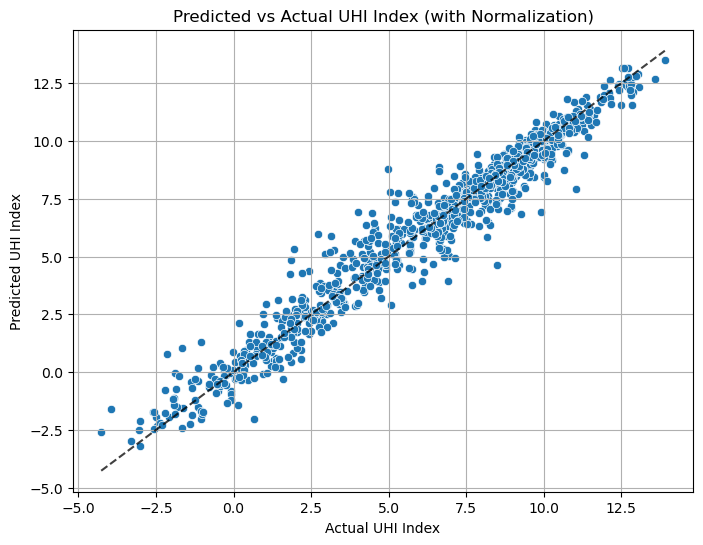

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual UHI Index")
plt.ylabel("Predicted UHI Index")
plt.title("Predicted vs Actual UHI Index (with Normalization)")
plt.grid(True)

# Add perfect prediction line
lims = [min(y_test.min(), y_pred_xgb.min()), max(y_test.max(), y_pred_xgb.max())]
plt.plot(lims, lims, 'k--', alpha=0.75)
plt.show()

This plot visualizes the performance of the *XGBoost* model by comparing predicted Urban Heat Island (UHI) index values with the actual values in the test dataset. As shown in the image, most points cluster closely along the diagonal, indicating a strong correlation between actual and predicted values.

This visual consistency supports the high R-squared score of `0.955` obtained earlier, demonstrating that the model explains a substantial portion of the variance in UHI intensity. While a few noticeable outliers appear—particularly around the midrange of the UHI index—they are relatively sparse.

Overall, the plot confirms that the model provides a reliable approximation of the UHI index across diverse urban conditions, with only minor deviations near the center of the range.

**Feature Importance**

To gain insights into how individual features contribute to the model’s predictions, *SHAP (SHapley Additive exPlanations)* is employed. SHAP is a game-theoretic approach that provides consistent and locally accurate attributions of feature importance for each prediction.

The Explainer class automatically selects the appropriate SHAP algorithm based on the model type. In this case, since XGBoost is a tree-based model, SHAP utilizes a fast, tree-specific explainer optimized for gradient-boosted decision trees.

Subsequently, a summary plot and scatter plots are generated, which ranks features by their mean absolute SHAP values, indicating their overall importance. The plots also illustrates how the value of each feature influences the model output (either positively or negatively), providing a clear and interpretable overview of feature effects. This level of interpretability is essential for understanding model behavior, validating feature relevance, and supporting transparent and trustworthy decision-making.

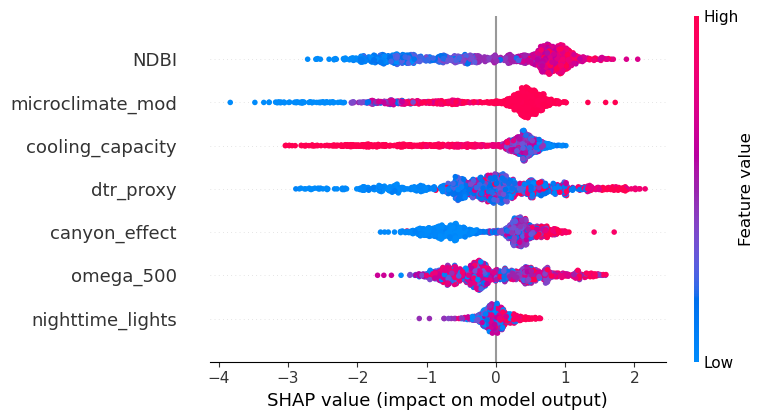

In [ ]:
# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)

# Show summary plot
shap.summary_plot(shap_values, X_test)

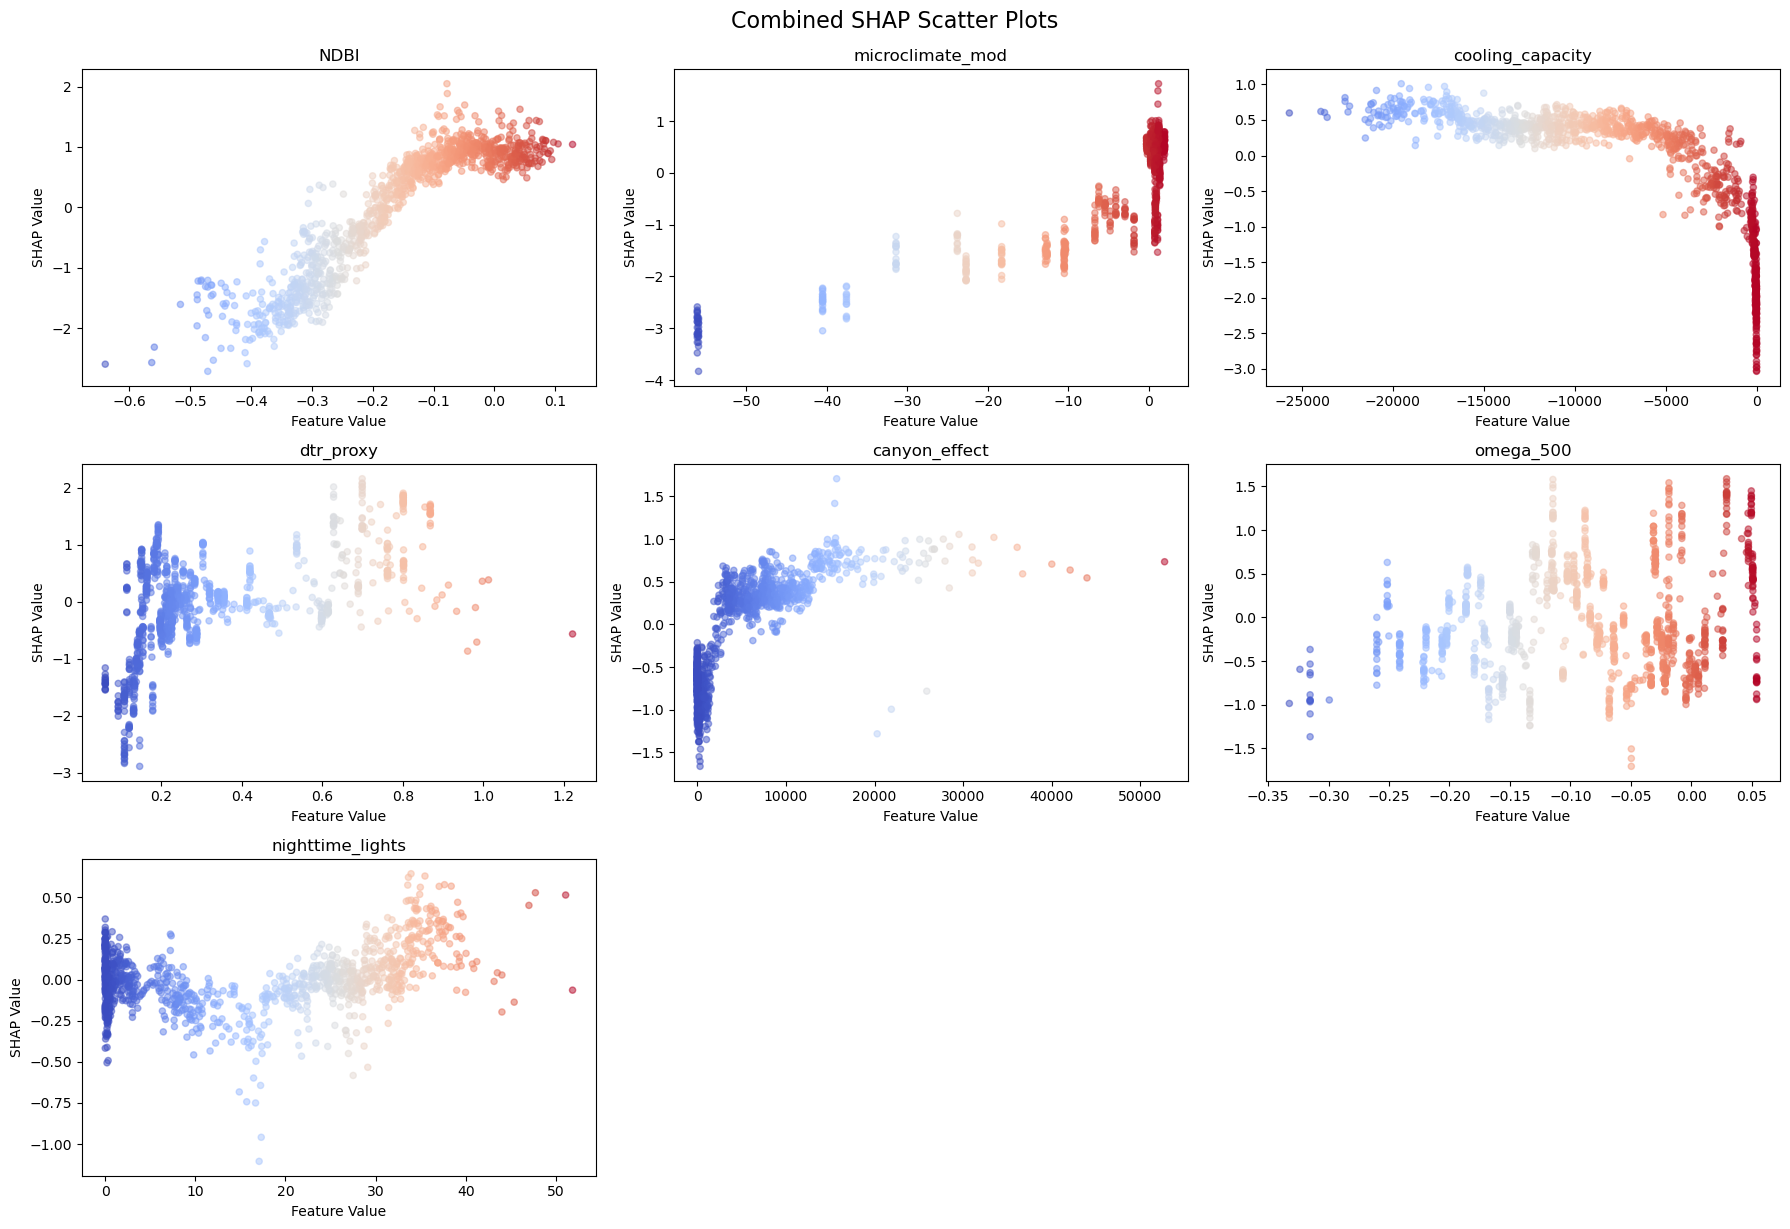

In [ ]:
# List of features to include in the combined scatter plot
features = [
    'NDBI', 'microclimate_mod', 'cooling_capacity',
    'dtr_proxy', 'canyon_effect', 'omega_500', 'nighttime_lights'
]

# Set up a multi-panel plot
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Plot SHAP scatter plots manually for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    shap_feature_values = X_test[feature].values
    shap_contributions = shap_values[:, feature].values

    ax.scatter(shap_feature_values, shap_contributions,
               alpha=0.5, s=20, c=shap_feature_values, cmap='coolwarm')
    ax.set_title(feature)
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("SHAP Value")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Combined SHAP Scatter Plots", fontsize=16, y=1.02)
plt.show()

The SHAP summary and scatter plots illustrate how each feature influences the model’s predictions of UHI intensity across barangays. Features are ranked by their average impact, with colors indicating feature values—red for high and blue for low.

1. **`NDBI (Normalized Difference Built-up Index)`**
- <u>Contribution</u>: Most significant contributor to higher UHI predictions.
- <u>Interpretation</u>: Areas with more buildings and concrete surfaces (high NDBI) tend to be hotter.

2. **`microclimate_mod`**
- <u>Contribution</u>: Strong positive influence on UHI predictions.
- <u>Interpretation</u>: Certain terrain features (like steep slopes facing the sun at higher elevations) can trap more heat, making these areas warmer.

3. **`cooling_capacity`**
- <u>Contribution</u>: Moderate negative effect on UHI predictions.
- <u>Interpretation</u>: Areas rich in vegetation and moisture can cool down more effectively, leading to lower temperatures.

4. **`dtr_proxy (Diurnal Temperature Range Proxy)`**
- <u>Contribution</u>: Slight positive relationship with UHI predictions.
- <u>Interpretation</u>: Smaller differences between day and night temperatures suggest that heat is retained longer, contributing to higher UHI.

5. **`canyon_effect`**
- <u>Contribution</u>: Moderate positive influence on UHI predictions.
- <u>Interpretation</u>: Densely built areas with little vegetation (urban canyons) trap heat, making them hotter.

6. **`omega_500 (Vertical Velocity at 500 hPa)`**
- <u>Contribution</u>: Slight positive effect on UHI predictions.
- <u>Interpretation</u>: Certain atmospheric conditions can reduce air movement, allowing heat to accumulate near the surface.

7. **`nighttime_lights`**
- <u>Contribution</u>: Minor positive contribution to UHI predictions.
- <u>Interpretation</u>: Areas with more artificial lighting at night often correspond to higher human activity and infrastructure, which can retain heat.

The SHAP analysis highlights that urbanization-related features such as `NDBI`, `canyon_effect`, and `nighttime_lights` are strong drivers of Urban Heat Island intensity in Cagayan de Oro City, reflecting the heat-retaining impact of built-up areas and human activity. Natural cooling elements like `cooling_capacity` play a crucial role in mitigating this effect, emphasizing the importance of vegetation and moisture in lowering local temperatures. Additionally, terrain and atmospheric factors—captured by `microclimate_mod` and `omega_500`—underscore how both landform characteristics and vertical air movement contribute to heat accumulation. These insights reinforce the need for targeted interventions, including expanding green spaces and optimizing urban design to improve airflow and reduce heat retention in the most affected barangays.

## **7 Conclusion and Recommendation**

**Conclusion**

This study successfully demonstrates the capability of machine learning, particularly the XGBoost model, to accurately predict Urban Heat Island (UHI) intensity at the barangay level in Cagayan de Oro City. The model achieves high predictive accuracy, with an R-squared of 0.973 and a low mean squared error (MSE) of 0.595, confirming its robustness across diverse urban conditions. Feature importance analysis using SHAP values highlights that urbanization factors—such as the Normalized Difference Built-up Index (NDBI), urban canyon effects, and nighttime lights—are the primary drivers of UHI intensity. In contrast, natural cooling factors like vegetation and moisture, represented by the cooling_capacity metric, significantly mitigate UHI effects. Additionally, terrain and atmospheric variables contribute meaningfully to local temperature variations, illustrating the complex interplay of multiple environmental factors in shaping urban microclimates.

Overall, these findings emphasize the critical role of land use and urban morphology in influencing heat accumulation, offering valuable insights into the spatial distribution of heat stress within the city.

To bridge research and practice, we developed an interactive dashboard application powered by the XGBoost model. This tool enables urban planners and local stakeholders to simulate how variations in key features—such as built-up areas, vegetation cover, and urban form—impact predicted UHI intensity at the barangay level. By providing a visual and user-friendly platform, the dashboard facilitates scenario analysis and supports data-driven decision-making for effective urban heat mitigation strategies.

To view the dashboard, visit: https://heatscape.streamlit.app/

**Recommendations**

To mitigate UHI effects and enhance urban resilience, the following strategies are recommended:

1. `Expand Urban Green Spaces`: Implementing green spaces, such as parks, green roofs, and urban forests, can significantly reduce ambient temperatures through shading and evapotranspiration. Studies have shown that green roofs can lower rooftop temperatures by up to 30%, and strategically planted trees can decrease surrounding temperatures by 2–4°C.

2. `Promote Reflective and Cool Materials`: Adopting reflective materials for pavements and rooftops can help reduce heat absorption. Cool roofs and pavements reflect more sunlight and absorb less heat, thereby lowering surface and ambient temperatures.

3. `Enhance Urban Design for Airflow`: Designing open, breathable urban spaces that facilitate natural airflow can mitigate heat entrapment. Urban planning should consider building orientations and street layouts that promote ventilation.

4. `Integrate UHI Considerations into Urban Planning`: Incorporating UHI mitigation strategies into urban planning policies ensures long-term resilience. This includes zoning regulations that encourage green spaces and the use of heat-reducing materials.

5. `Leverage Machine Learning for Continuous Monitoring`: Utilizing machine learning models for ongoing monitoring can help identify emerging UHI hotspots and assess the effectiveness of mitigation strategies over time.

By implementing these recommendations, city planners and policymakers can effectively mitigate urban heat stress, improve livability, and enhance climate resilience at the barangay level across Cagayan de Oro City.

## **8 References**

- Aboulnaga, M., Trombadore, A., Mostafa, M., & Abouaiana, A. (2024). *Understanding Urban Heat Island Effect: Causes, Impacts, Factors, and Strategies for Better Livability and Climate Change Mitigation and Adaptation.* In Livable Cities. Springer. https://doi.org/10.1007/978-3-031-51220-9_2
- Liu, Q., Hang, T., Wu, Y. (2025). *Unveiling differential impacts of multidimensional urban morphology on heat island effect across local climate zones: Interpretable CatBoost-SHAP machine learning model* Building and Environment. https://doi.org/10.1016/j.buildenv.2025.112574.
- Urban Design Lab. (n.d.). *Urban heat island effect mitigation strategies for cooler cities.* Retrieved May 21, 2025, from https://urbandesignlab.in/urban-heat-island-effect-mitigation-strategies-for-cooler-cities/
- HomeSight. (n.d.). *Urban planning and urban heat mitigation: Policy solutions.* Retrieved May 21, 2025, from https://homesight.org/urban-planning-and-urban-heat-mitigation-policy-solutions/
- NOAA Climate Program Office. (n.d.). *Using machine learning to combat the urban heat island effect.* Retrieved May 21, 2025, from https://cpo.noaa.gov/using-machine-learning-to-combat-the-urban-heat-island-effect/